## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing:2px; color:#364FF5; font-size:120%; text-align:left;padding: 0px; border-bottom: 3px solid #364FF5">라이브러리</p>

In [18]:

import pandas as pd
import numpy as np

from tqdm import tqdm_notebook, tqdm
import warnings
warnings.filterwarnings("ignore")

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio 
import glob

import urllib.parse
from urllib.parse import urlparse
import re

import matplotlib as plt
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib as mpl
import koreanize_matplotlib  

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

pd.set_option('display.max_colwidth', None)

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing:2px; color:#364FF5; font-size:120%; text-align:left;padding: 0px; border-bottom: 3px solid #364FF5">EDA</p>

In [2]:
# 데이터 합치기
# tmp = glob.glob('C:/Users/User/Documents/Data_Project/Data_Science_On/yunyoung/data/ScienceON_log_data/data/utf8/*')
# df_all = pd.DataFrame()

# for file_path in tqdm_notebook(tmp):
#     try:
#         df = pd.read_csv(file_path)
#         df_all = pd.concat([df,df_all])
#     except:
#         print(f'error : {file_path}')

# df_all.to_csv('scienceOn.csv', index = False)

In [2]:
df = pd.read_csv('../scienceOn.csv')

### [1] 데이터 정보 확인

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206762094 entries, 0 to 206762093
Data columns (total 9 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   사용자IP     object
 1   서비스 종류    object
 2   콘텐츠 종류    object
 3   웹/모바일 구분  object
 4   로그등록시간    object
 5   이전URL     object
 6   요청URL     object
 7   검색질의어     object
 8   조회 컨텐츠    object
dtypes: object(9)
memory usage: 13.9+ GB


### [2] 데이터 결측치 확인

In [4]:
df.isnull().sum()

사용자IP               0
서비스 종류              0
콘텐츠 종류       45511251
웹/모바일 구분            1
로그등록시간              1
이전URL       109978266
요청URL               1
검색질의어       196900500
조회 컨텐츠       56674146
dtype: int64

### [3] 칼럼 확인

'사용자IP', '서비스 종류', '콘텐츠 종류', '웹/모바일 구분', '로그등록시간', '이전URL', '요청URL', '검색질의어', '조회 컨텐츠'

In [5]:
df.columns

Index(['사용자IP', '서비스 종류', '콘텐츠 종류', '웹/모바일 구분', '로그등록시간', '이전URL', '요청URL',
       '검색질의어', '조회 컨텐츠'],
      dtype='object')

##### [3-1] 서비스 종류 칼럼

'상세보기', '원문보기', '검색', '다운로드', '로그인'

In [10]:
df['서비스 종류'].unique()

array(['상세보기', '검색', '원문보기', '다운로드', '로그인'], dtype=object)

##### [3-2] 콘텐츠 종류 칼럼

'특허', '논문', '보고서', '동향', '연구자', '통합', '표/그림', '기능', '서비스'

In [11]:
df['콘텐츠 종류'].unique()

array(['논문', '연구자', '특허', '보고서', nan, '동향', '통합', '기능', '표/그림', '연구데이터',
       '서비스'], dtype=object)

##### [3-3] 로그 등록 시간 칼럼

yyyy-mm-dd hh:mm:ss 형태

In [12]:
df['로그등록시간'].unique()

array(['2022-12-16 00:00:00', '2022-12-16 00:00:01',
       '2022-12-16 00:00:02', ..., '2022-01-01 00:00:02',
       '2022-01-01 00:00:01', '2022-01-01 00:00:00'], dtype=object)

##### [3-4] 이전 URL 칼럼

구글, 네이버, 사이언스온 등 다양한 url 로 구성

In [13]:
df['이전URL'].unique()

array([nan, 'https://scienceon.kisti.re.kr/srch/PORSrchPatentList.do',
       'https://www.google.co.kr/', ...,
       'https://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&query=%EB%B9%84%ED%96%89%EC%A0%9C%EC%96%B4%EC%BB%B4%ED%93%A8%ED%84%B0+%EC%9E%90%EB%8F%99%EA%B7%80%ED%99%98&oquery=%EB%B9%84%ED%96%89%EC%A0%9C%EC%96%B4%EC%BB%B4%ED%93%A8%ED%84%B0&tqi=hN8kgwprvN8ssjv4780ssssssGV-444520',
       'https://m.search.naver.com/search.naver?sm=mtb_hty.top&where=m&oquery=%EC%8B%A0%EC%83%9D%EC%95%84+%EB%B0%B1%EC%8B%A0&tqi=hN8jIdp0JxVssLYeHndsssssscV-082139&query=%EC%8B%A0%EC%83%9D%EC%95%84+%EB%B0%B1%EC%8B%A0+%EC%A2%85%EB%A5%98',
       'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=K-POP+%EC%95%84%EC%9D%B4%EB%8F%8C+%EA%B7%B8%EB%A3%B9%EC%9D%98+%ED%8E%B8%EC%A4%91'],
      dtype=object)

##### [3-5] 요청 URL 칼럼

 selectPORSrchPatent, selectPORSrchImage, selectPORSrchArticle .. 등 다양한 URL로 구성 
 
 url을 통해 이용 서비스 파악 가능

In [14]:
print(len(df['요청URL'].unique()))
df['요청URL'].unique()

40


array(['/srch/selectPORSrchArticle.do', '/srch/selectPORSrchRsrchman.do',
       '/srch/PORSrchPatentList.do', '/srch/selectPORSrchReport.do',
       '/srch/selectPORSrchArticleList.do',
       '/commons/util/originalView.do', '/cm/file/fileDownload.do',
       '/srch/selectPORSrchPatent.do',
       '/mobile/srch/selectPORSrchArticle.do',
       '/srch/selectPORSrchTrend.do',
       '/mobile/srch/selectPORSrchPatent.do',
       '/srch/selectPORSrchRsrchmanList.do', '/logn/login.do',
       '/srch/PORSrchReportList.do', '/srch/selectPORSrchTotal.do',
       '/srch/selectPORSrchFnct.do',
       '/mobile/srch/selectPORSrchReport.do', '/mobile/logn/login.do',
       '/srch/selectPORSrchFnctList.do',
       '/srch/selectPORSrchTrendList.do',
       '/mobile/srch/selectPORSrchTotal.do',
       '/mobile/srch/selectPORSrchTrend.do',
       '/mobile/srch/selectPORSrchArticleList.do',
       '/srch/selectPORSrchImage.do', '/srch/selectPORSrchImageList.do',
       '/mobile/srch/selectPORSrchTrend

#### [3-5-1] 요청URL 종류 별 서비스 종류 확인

In [12]:
request_url_list = df['요청URL'].unique()
url_service_mapping = {}
for url in request_url_list:
    service_types = df.loc[df['요청URL'] == url, '서비스 종류'].unique()
    url_service_mapping[url] = service_types

url_service_df = {'요청URL': [], '서비스종류': []}

for url, service_types in url_service_mapping.items():
    for service_type in service_types:
        url_service_df['요청URL'].append(url)
        url_service_df['서비스종류'].append(service_type)

url_service_df = pd.DataFrame(url_service_df)
url_service_df

,요청URL,서비스종류
0,/srch/selectPORSrchArticle.do,상세보기
1,/srch/selectPORSrchRsrchman.do,상세보기
2,/srch/PORSrchPatentList.do,검색
3,/srch/selectPORSrchReport.do,상세보기
4,/srch/selectPORSrchArticleList.do,검색
5,/commons/util/originalView.do,원문보기
6,/cm/file/fileDownload.do,다운로드
7,/srch/selectPORSrchPatent.do,상세보기
8,/mobile/srch/selectPORSrchArticle.do,상세보기
9,/srch/selectPORSrchTrend.do,상세보기


## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing:2px; color:#364FF5; font-size:120%; text-align:left;padding: 0px; border-bottom: 3px solid #364FF5">데이터 전처리</p>

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing:2px; color:#5B9FF5; font-size:80%; text-align:left;padding: 0px; border-bottom: 3px solid #5B9FF5">사용자IP</p>

IP 주소는 점으로 구분된 10진수 형식(예: 192.168.1.1)으로 표시되는 32비트 숫자

### [1] 비정상 패턴 제거

점으로 구분된 10진수 형식 숫자와 '*' 문자로 이루어진 IP 만 남긴다

- 비정상 IP 예제 

    - %2527, %27, %c0%a7, afdjpwjp,10.20.***.40	

In [3]:
df.groupby('사용자IP').size().reset_index(name='접속횟수')

,사용자IP,접속횟수
0,%2527,7
1,%27,7
2,%c0%a7,7
3,&quot;,7
4,',7
...,...,...
1183942,99.99.***.91,1
1183943,99.99.***.93,1
1183944,::1,1
1183945,[0:0:0:0:0:0:0:1],2


In [4]:


# 점으로 구분된 10진수 형식 숫자와 '*' 문자로 이루어진 IP 만 남긴다
def is_valid_ip(ip):
    try:
        parts = ip.split('.')
        if len(parts) != 4 or not re.match(r'^[0-9.*]+$', ip):
            return False
        for idx, part in enumerate(parts):
            if idx !=2: 
                if not 0 <= int(part) <= 255:
                    return False
            else:
                if len(part)>3:
                    return False
        return True
    except:
        return False

In [5]:
valid_ip_mask = df['사용자IP'].apply(is_valid_ip)
valid_df = df[valid_ip_mask]
valid_df

,사용자IP,서비스 종류,콘텐츠 종류,웹/모바일 구분,로그등록시간,이전URL,요청URL,검색질의어,조회 컨텐츠
0,175.209.***.105,상세보기,논문,웹,2022-12-16 00:00:00,NaN,/srch/selectPORSrchArticle.do,NaN,ATN0038544815
1,216.244.***.248,상세보기,연구자,웹,2022-12-16 00:00:00,NaN,/srch/selectPORSrchRsrchman.do,NaN,ADPER0000056129
2,175.209.***.105,상세보기,논문,웹,2022-12-16 00:00:00,NaN,/srch/selectPORSrchArticle.do,NaN,ATN0027018437
3,211.249.***.103,상세보기,논문,웹,2022-12-16 00:00:00,NaN,/srch/selectPORSrchArticle.do,NaN,NART33121496
4,175.209.***.105,상세보기,논문,웹,2022-12-16 00:00:00,NaN,/srch/selectPORSrchArticle.do,NaN,ATN0012560142
...,...,...,...,...,...,...,...,...,...
206762089,66.249.***.24,상세보기,특허,웹,2022-01-01 00:00:02,NaN,/srch/selectPORSrchPatent.do,NaN,USP2015109171917
206762090,40.77.***.49,원문보기,NaN,웹,2022-01-01 00:00:01,NaN,/commons/util/originalView.do,NaN,NaN
206762091,59.15.***.60,상세보기,논문,웹,2022-01-01 00:00:01,http://click.ndsl.kr/,/srch/selectPORSrchArticle.do,NaN,JAKO201721241152986
206762092,203.253.***.142,상세보기,논문,웹,2022-01-01 00:00:00,NaN,/srch/selectPORSrchArticle.do,NaN,ART002353462


### [2] 국내 범위 IP만 추출 


- IP 정보 : <a src = 'https://xn--3e0bx5euxnjje69i70af08bea817g.xn--3e0b707e/jsp/statboard/IPAS/ovrse/natal/IPaddrBandCurrent.jsp'>한국인터넷정보센터</a>


In [7]:
korean_ip_list = pd.read_excel("../yunyoung/EDA/data/KR_NIPLIST_(2023.09.26).xlsx", engine='openpyxl')
kr_ip_pattern  = ['.'.join(ip.split('.')[:2]) for ip in korean_ip_list['시작주소']]
kr_ip_pattern = set(kr_ip_pattern)

In [8]:
valid_df = valid_df[valid_df['사용자IP'].str.startswith(tuple(kr_ip_pattern))]
valid_df

,사용자IP,서비스 종류,콘텐츠 종류,웹/모바일 구분,로그등록시간,이전URL,요청URL,검색질의어,조회 컨텐츠
3,211.249.***.103,상세보기,논문,웹,2022-12-16 00:00:00,NaN,/srch/selectPORSrchArticle.do,NaN,NART33121496
5,118.32.***.151,검색,특허,웹,2022-12-16 00:00:00,https://scienceon.kisti.re.kr/srch/PORSrchPatentList.do,/srch/PORSrchPatentList.do,풀무원,NaN
19,121.146.***.212,상세보기,논문,웹,2022-12-16 00:00:02,http://click.ndsl.kr/,/srch/selectPORSrchArticle.do,NaN,JAKO201718155359562
28,222.112.***.95,상세보기,논문,웹,2022-12-16 00:00:03,NaN,/srch/selectPORSrchArticle.do,NaN,JAKO201330360973834
38,211.249.***.26,상세보기,논문,웹,2022-12-16 00:00:04,NaN,/srch/selectPORSrchArticle.do,NaN,NART17282265
...,...,...,...,...,...,...,...,...,...
206762070,203.253.***.142,상세보기,논문,웹,2022-01-01 00:00:10,NaN,/srch/selectPORSrchArticle.do,NaN,ART002324267
206762071,114.111.***.43,상세보기,특허,웹,2022-01-01 00:00:10,NaN,/srch/selectPORSrchPatent.do,NaN,USP1999035882982
206762083,114.111.***.28,상세보기,특허,웹,2022-01-01 00:00:05,NaN,/srch/selectPORSrchPatent.do,NaN,USP2006057041573
206762092,203.253.***.142,상세보기,논문,웹,2022-01-01 00:00:00,NaN,/srch/selectPORSrchArticle.do,NaN,ART002353462


## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing:2px; color:#5B9FF5; font-size:80%; text-align:left;padding: 0px; border-bottom: 3px solid #5B9FF5"> 로그등록시간</p>

### [1] 사용자 IP 별로 동일한 시간대에 중복된 데이터를 처리



중복 데이터 확인 

In [8]:
duplicates = valid_df[valid_df.duplicated(subset=['로그등록시간', '사용자IP'], keep='first')]
duplicates

,사용자IP,서비스 종류,콘텐츠 종류,웹/모바일 구분,로그등록시간,이전URL,요청URL,검색질의어,조회 컨텐츠
2,175.209.***.105,상세보기,논문,웹,2022-12-16 00:00:00,NaN,/srch/selectPORSrchArticle.do,NaN,ATN0027018437
4,175.209.***.105,상세보기,논문,웹,2022-12-16 00:00:00,NaN,/srch/selectPORSrchArticle.do,NaN,ATN0012560142
8,199.47.***.17,상세보기,보고서,웹,2022-12-16 00:00:00,NaN,/srch/selectPORSrchReport.do,NaN,KAR2016082463
15,175.209.***.105,상세보기,논문,웹,2022-12-16 00:00:01,NaN,/srch/selectPORSrchArticle.do,NaN,ATN0030215638
18,199.47.***.17,상세보기,논문,웹,2022-12-16 00:00:01,NaN,/srch/selectPORSrchArticle.do,NaN,JAKO201810038012057
...,...,...,...,...,...,...,...,...,...
206761910,66.249.***.21,상세보기,논문,웹,2022-01-01 00:01:12,http://click.ndsl.kr/,/srch/selectPORSrchArticle.do,NaN,DIKO0013539614
206761917,66.249.***.21,상세보기,특허,모바일,2022-01-01 00:01:09,NaN,/mobile/srch/selectPORSrchPatent.do,NaN,USP2001056234597
206762004,66.249.***.21,상세보기,논문,웹,2022-01-01 00:00:32,http://click.ndsl.kr/,/srch/selectPORSrchArticle.do,NaN,ART001030076
206762023,66.249.***.21,검색,논문,웹,2022-01-01 00:00:23,NaN,/srch/selectPORSrchArticleList.do,유전자 변형군,NaN


In [9]:
duplicates['사용자IP'].value_counts()

사용자IP
150.183.***.172    1431273
175.209.***.105    1324018
3.38.***.220        932447
66.249.***.21       423660
66.249.***.24       374541
                    ...   
54.84.***.50             1
54.162.***.5             1
3.135.***.59             1
136.159.***.169          1
82.102.***.38            1
Name: count, Length: 359879, dtype: int64

동일시간 첫번째 데이터를 유지하고 나머지 중복 데이터를 제거

In [9]:
valid_df['로그등록시간'] = pd.to_datetime(valid_df['로그등록시간'])
valid_df = valid_df.groupby(['사용자IP', '로그등록시간']).first().reset_index()

In [10]:
valid_df.to_csv('valid_df.csv', index=False)


## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing:2px; color:#5B9FF5; font-size:80%; text-align:left;padding: 0px; border-bottom: 3px solid #5B9FF5">이전 URL</p>

### [1] 비정상 이전 URL 확인

**이전URL** 결측치값은 'None'값으로 대체

In [11]:
valid_df['이전URL'] = valid_df['이전URL'].fillna('None')

http가 포함되지 않은 이전URL 확인

In [12]:
NothttpPreUrl = valid_df[~valid_df['이전URL'].str.contains('http')]['이전URL'].unique()
NothttpPreUrldf = pd.DataFrame(data = list(NothttpPreUrl), columns = ['http제외_이전URL'])
NothttpPreUrldf

,http제외_이전URL
0,None
1,android-app://jp.naver.line.android/
2,android-app://com.google.android.googlequicksearchbox
3,android-app://com.google.android.googlequicksearchbox/
4,android-app://com.google.android.gm/
5,android-app://org.telegram.messenger/
6,scienceon.kisti.re.kr
7,android-app://com.slack/
8,android-app://viva.republica.toss/
9,android-app://com.linkedin.android/


**이전URL에서 http가 제외된 유형**

1. **알 수 없는 문자열**
   - `itsme..jjjjj`
   - `privacy:protected`
   - `(null)`
   - `TEST_TENCENT`
   - `'`
   - `%2527`
   - `lkslprobege000009lk`
   - `'><a><script>alert(66)</script>`
   - `"where are you from?"`
   - `"sukong"`
   - `"TEST_TENCENT"`
   - `'\x00'`
   - ...

2. **예외 정상 URL 유형** : http는 존재하지 않으나 정상 URL로 간주되는 경우
   - `scienceon.kisti.re.kr`
   - `google.com`
   - `www.google.com`
   - `chrome://newtab/`
   - `scienceon.kisti.re.kr/commons/util/originalView.do?dbt=TRKO&cn=TRKO201900016033`
   - `android-app://com.google.android.googlequicksearchbox` (android가 포함된 주소)

In [13]:
abnorMalPreUrldf = NothttpPreUrldf[~NothttpPreUrldf['http제외_이전URL'].str.contains('com|None|scienceon|google|android|chrome')].reset_index(drop=True)
abnorMalPreUrldf.rename(columns={'http제외_이전URL':'이상한_이전URL'}, inplace=True)
abnorMalPreUrldf

,이상한_이전URL
0,%27
1,"'""></a><script>alert(64)</script>"
2,'
3,lkslprobege000064lk
4,lkslprobege00007Elk
5,%2527
6,&quot;


이전URL에서 알 수 없는 문자열을 포함하는 IP는 제거

- 210.119.***.17    

In [14]:
abnormalPreUrlList = abnorMalPreUrldf['이상한_이전URL'].tolist()
valid_df[valid_df['이전URL'].isin(abnormalPreUrlList)]['사용자IP'].value_counts()

사용자IP
210.119.***.17    10
Name: count, dtype: int64

In [15]:
clean_data = valid_df.copy()
clean_data = clean_data[clean_data['사용자IP']!='210.119.***.17']
clean_data

,사용자IP,로그등록시간,서비스 종류,콘텐츠 종류,웹/모바일 구분,이전URL,요청URL,검색질의어,조회 컨텐츠
0,1.11.***.10,2022-02-13 19:43:47,상세보기,논문,웹,https://www.google.com/,/srch/selectPORSrchArticle.do,None,NPAP12584646
1,1.11.***.10,2022-02-13 19:43:59,원문보기,None,웹,https://scienceon.kisti.re.kr/srch/selectPORSrchArticle.do?cn=NPAP12584646&dbt=NPAP,/commons/util/originalView.do,None,None
2,1.11.***.10,2022-02-18 14:05:43,상세보기,동향,웹,https://www.google.com/,/srch/selectPORSrchTrend.do,None,SCTM00127293
3,1.11.***.10,2022-03-31 16:12:04,상세보기,논문,웹,https://www.google.com/,/srch/selectPORSrchArticle.do,None,JAKO201328053101572
4,1.11.***.10,2022-04-14 23:08:18,상세보기,보고서,웹,https://www.google.com/,/srch/selectPORSrchReport.do,None,KAR2012059269
...,...,...,...,...,...,...,...,...,...
36706730,91.240.***.73,2022-05-18 21:24:21,상세보기,특허,웹,https://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&query=%ED%83%AD+forming%2C+cutting+tap+tool&oquery=%ED%83%AD+forming&tqi=hogDMwprvxZsskXGLvsssssst7C-316644,/srch/selectPORSrchPatent.do,None,USP2007077241088
36706731,91.240.***.73,2022-05-20 19:45:54,상세보기,특허,웹,https://www.google.com/,/srch/selectPORSrchPatent.do,None,KOR1019980015276
36706732,91.240.***.8,2022-08-17 22:25:11,상세보기,보고서,웹,None,/srch/selectPORSrchReport.do,None,TRKO201800042334
36706733,91.240.***.89,2022-08-30 13:50:07,상세보기,논문,웹,https://www.google.com/,/srch/selectPORSrchArticle.do,None,DIKO0014916091


### [2] 이전URL 과 요청URL 간 디바이스 불일치 데이터 제거

이전URL과 요청URL의 연결이 웹-웹, 모바일-모바일이 아닌 경우

In [16]:
deviceAllcheck = clean_data[clean_data['이전URL'] != 'None']

모바일 주소 조건 : URL 주소에 ://m., mobile, app 포함

In [17]:
#* 모바일 주소 조건
mobileCondition = '://m|mobile|app'
#* 웹에 포함되면 안되는 조건 
requestURLExclusion = mobileCondition #* 모바일 문자열 제외

##### case1. 웹/모바일 구분값이 웹인데, 이전URL은 모바일 주소면서, 요청URL은 웹인 경우로 모바일 - 웹 형태

In [18]:
preMoreqWeb = deviceAllcheck[(deviceAllcheck['웹/모바일 구분'] == '웹') 
               & deviceAllcheck['이전URL'].str.contains(mobileCondition) &
               ~deviceAllcheck['요청URL'].str.contains(requestURLExclusion)]
preMoreqWeb.shape 

(661953, 9)

##### case2. 웹/모바일 구분값이 웹인데, 이전URL은 웹이면서, 요청URL은 모바일인 경우로 즉, 웹 - 모바일 형태

In [19]:
preWebreqMo = deviceAllcheck[(deviceAllcheck['웹/모바일 구분'] == '웹') 
               & deviceAllcheck['요청URL'].str.contains(mobileCondition) &
               ~deviceAllcheck['이전URL'].str.contains(requestURLExclusion)]
preWebreqMo.shape

(0, 9)

##### case3. 웹/모바일 구분값이 모바일인데, 이전URL은 모바일이면서, 요청URL은 웹인 경우로 즉, 모바일 - 웹 형태

In [20]:
mopreMoreqWeb = deviceAllcheck[(deviceAllcheck['웹/모바일 구분'] == '모바일') 
               & deviceAllcheck['이전URL'].str.contains(mobileCondition) &
                ~deviceAllcheck['요청URL'].str.contains(requestURLExclusion)]
mopreMoreqWeb.shape

(0, 9)

##### case4. 웹/모바일 구분값이 모바일인데, 이전URL은 웹이면서, 요청URL은 모바일인 경우로 즉, 웹 - 모바일 형태

In [21]:
mopreWebreqMo = deviceAllcheck[(deviceAllcheck['웹/모바일 구분'] == '모바일') 
               & deviceAllcheck['요청URL'].str.contains(mobileCondition) &
                ~deviceAllcheck['이전URL'].str.contains(requestURLExclusion)]
mopreWebreqMo.shape

(43879, 9)

##### case1과 case4 공통 IP 제거

case1. 웹/모바일 구분값이 **웹**인데, 이전URL은 모바일 주소면서, 요청URL은 웹인 경우로 **모바일 - 웹** 형태

case4. 웹/모바일 구분값이 **모바일**인데, 이전URL은 웹이면서, 요청URL은 모바일인 경우로 즉, **웹 - 모바일** 형태



In [22]:
preMoreqWeb_IP = preMoreqWeb['사용자IP'].value_counts().index
mopreWebreqMo_IP = mopreWebreqMo['사용자IP'].value_counts().index
drop_IP = list(set(preMoreqWeb_IP) & set(mopreWebreqMo_IP))
len(drop_IP)

17195

In [23]:
clean_data = clean_data[~clean_data['사용자IP'].isin(drop_IP)]
clean_data.head()

,사용자IP,로그등록시간,서비스 종류,콘텐츠 종류,웹/모바일 구분,이전URL,요청URL,검색질의어,조회 컨텐츠
0,1.11.***.10,2022-02-13 19:43:47,상세보기,논문,웹,https://www.google.com/,/srch/selectPORSrchArticle.do,None,NPAP12584646
1,1.11.***.10,2022-02-13 19:43:59,원문보기,None,웹,https://scienceon.kisti.re.kr/srch/selectPORSrchArticle.do?cn=NPAP12584646&dbt=NPAP,/commons/util/originalView.do,None,None
2,1.11.***.10,2022-02-18 14:05:43,상세보기,동향,웹,https://www.google.com/,/srch/selectPORSrchTrend.do,None,SCTM00127293
3,1.11.***.10,2022-03-31 16:12:04,상세보기,논문,웹,https://www.google.com/,/srch/selectPORSrchArticle.do,None,JAKO201328053101572
4,1.11.***.10,2022-04-14 23:08:18,상세보기,보고서,웹,https://www.google.com/,/srch/selectPORSrchReport.do,None,KAR2012059269


## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing:2px; color:#5B9FF5; font-size:80%; text-align:left;padding: 0px; border-bottom: 3px solid #5B9FF5">유입 검색어 컬럼 생성</p>

### [1] 이전 URL로 부터 유입 검색어 추출

이전 URL 칼럼의 Naver, Google URL 속 쿼리를 추출한 후,
keyword 파라미터 값을 디코딩 하여 추출 하여 유입 검색어 칼럼 생성

**이전URL 속 검색어 형태**

1. **naver**

- `query=`로 이루어진 텍스트 추출
- `&`으로 다른 파라미터와 구분되는 경우도 있음
- 바로 UTF-8 인코딩 가능
- UTF-8 인코딩 과정 거쳐야함


2. **google & scienceon**
- 구글을 통해 scienceOn URL을 입력하여 ScienceOn 검색창으로 바로 가는 URL 존재
- URL 예시: [ScienceOn URL](https://www.google.co.kr/url?esrc=s&q=&rct=j&sa=U&url=https://scienceon.kisti.re.kr/srch/selectPORSrchArticleList.do%3Fpage%3D32%26searchKeyword%3D%25ED%2598%25B8%25ED%259D%25A1%26prefixQuery%3D%26collectionQuery%3D%26showQuery%3D%25ED%2598%25B8%25ED%259D%25A1%26resultCount%3D10%26sortName%3DRANK%26sortOrder%3DDESC%26colType%3Dscholar%26colTypeByUser%3D%26filterValue%3D)
- `searchKeyword`와 `prefixQuery` 사이에 있는 텍스트 추출: `searchKeyword%3D%25ED%2598%25B8%25ED%259D%25A1%26prefixQuery`
- 두 번의 UTF-8 인코딩 과정 거쳐야함



In [24]:
def query_decode(Url):
    isNaver = re.search(r'naver.*query', Url, flags=re.IGNORECASE)
    isGoogle = re.search(r'google.*query', Url, flags=re.IGNORECASE)
    
    if isNaver:
        match = re.search(r'query=(.*?)&', Url)
        if match:
            extracted_text = match.group(1)
        else:
            match = re.search(r'query=(.*)', Url)
            if match:
                extracted_text = match.group(1)
            else:
                extracted_text = ""

        decoded_string = urllib.parse.unquote(extracted_text, encoding='utf-8')
        return decoded_string

    
    elif isGoogle:
        pattern = r"searchKeyword%3D(.*?)%26prefixQuery"
        match = re.search(pattern, Url)
        if match:
            extracted_text = match.group(1)  # 추출된 텍스트
            decoded_string = urllib.parse.unquote(extracted_text, encoding='utf-8')
            decoded_string = urllib.parse.unquote(decoded_string, encoding='utf-8')
            return decoded_string
        else:
            return None

    else:
        return None


In [25]:
clean_data['유입 검색어'] = clean_data['이전URL'].fillna('').apply(query_decode)
clean_data

,사용자IP,로그등록시간,서비스 종류,콘텐츠 종류,웹/모바일 구분,이전URL,요청URL,검색질의어,조회 컨텐츠,유입 검색어
0,1.11.***.10,2022-02-13 19:43:47,상세보기,논문,웹,https://www.google.com/,/srch/selectPORSrchArticle.do,None,NPAP12584646,None
1,1.11.***.10,2022-02-13 19:43:59,원문보기,None,웹,https://scienceon.kisti.re.kr/srch/selectPORSrchArticle.do?cn=NPAP12584646&dbt=NPAP,/commons/util/originalView.do,None,None,None
2,1.11.***.10,2022-02-18 14:05:43,상세보기,동향,웹,https://www.google.com/,/srch/selectPORSrchTrend.do,None,SCTM00127293,None
3,1.11.***.10,2022-03-31 16:12:04,상세보기,논문,웹,https://www.google.com/,/srch/selectPORSrchArticle.do,None,JAKO201328053101572,None
4,1.11.***.10,2022-04-14 23:08:18,상세보기,보고서,웹,https://www.google.com/,/srch/selectPORSrchReport.do,None,KAR2012059269,None
...,...,...,...,...,...,...,...,...,...,...
36706730,91.240.***.73,2022-05-18 21:24:21,상세보기,특허,웹,https://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&query=%ED%83%AD+forming%2C+cutting+tap+tool&oquery=%ED%83%AD+forming&tqi=hogDMwprvxZsskXGLvsssssst7C-316644,/srch/selectPORSrchPatent.do,None,USP2007077241088,"탭+forming,+cutting+tap+tool"
36706731,91.240.***.73,2022-05-20 19:45:54,상세보기,특허,웹,https://www.google.com/,/srch/selectPORSrchPatent.do,None,KOR1019980015276,None
36706732,91.240.***.8,2022-08-17 22:25:11,상세보기,보고서,웹,None,/srch/selectPORSrchReport.do,None,TRKO201800042334,None
36706733,91.240.***.89,2022-08-30 13:50:07,상세보기,논문,웹,https://www.google.com/,/srch/selectPORSrchArticle.do,None,DIKO0014916091,None


## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing:2px; color:#5B9FF5; font-size:80%; text-align:left;padding: 0px; border-bottom: 3px solid #5B9FF5">이전 URL 도메인 칼럼 생성(주요 도메인)</p>


**주요 이전 URL**

- scienceon.kisti.re.kr 
- www.google.com  
- click.ndsl.kr 
- search.naver.com  
- www.dbpia.co.kr
- www.bing.com   
- www.ntis.go.kr 

In [26]:
from urllib.parse import urlparse


def get_domain(url):
    if pd.isna(url):  # np.nan 값인 경우 처리
        return None
    else:
        url = str(url)  # 문자열로 변환
        parsed_url = urlparse(url)
        if parsed_url.scheme and parsed_url.netloc:
            site_domain = parsed_url.netloc
            return site_domain
        else:
            return None

In [27]:
url_domain = clean_data['이전URL'].apply(get_domain)
url_domain

0                  www.google.com
1           scienceon.kisti.re.kr
2                  www.google.com
3                  www.google.com
4                  www.google.com
                    ...          
36706730         search.naver.com
36706731           www.google.com
36706732                     None
36706733           www.google.com
36706734           www.google.com
Name: 이전URL, Length: 25817736, dtype: object

In [28]:
clean_data['이전URL 도메인'] = url_domain
clean_data.head()

,사용자IP,로그등록시간,서비스 종류,콘텐츠 종류,웹/모바일 구분,이전URL,요청URL,검색질의어,조회 컨텐츠,유입 검색어,이전URL 도메인
0,1.11.***.10,2022-02-13 19:43:47,상세보기,논문,웹,https://www.google.com/,/srch/selectPORSrchArticle.do,None,NPAP12584646,None,www.google.com
1,1.11.***.10,2022-02-13 19:43:59,원문보기,None,웹,https://scienceon.kisti.re.kr/srch/selectPORSrchArticle.do?cn=NPAP12584646&dbt=NPAP,/commons/util/originalView.do,None,None,None,scienceon.kisti.re.kr
2,1.11.***.10,2022-02-18 14:05:43,상세보기,동향,웹,https://www.google.com/,/srch/selectPORSrchTrend.do,None,SCTM00127293,None,www.google.com
3,1.11.***.10,2022-03-31 16:12:04,상세보기,논문,웹,https://www.google.com/,/srch/selectPORSrchArticle.do,None,JAKO201328053101572,None,www.google.com
4,1.11.***.10,2022-04-14 23:08:18,상세보기,보고서,웹,https://www.google.com/,/srch/selectPORSrchReport.do,None,KAR2012059269,None,www.google.com


In [29]:
top_site = clean_data['이전URL 도메인'].value_counts()[:15]
top_site

이전URL 도메인
scienceon.kisti.re.kr                     6833832
www.google.com                            2877159
click.ndsl.kr                              981572
www.google.co.kr                           614375
search.naver.com                           407716
m.search.naver.com                         297239
www.dbpia.co.kr                             89361
click-ndsl-kr.access.yonsei.ac.kr:8443      10864
www.bing.com                                 8208
www.ndsl.kr                                  5099
www.google.com.hk                            5089
search.daum.net                              4604
www.ntis.go.kr                               3952
blog.naver.com                               3668
www.google.co.jp                             3520
Name: count, dtype: int64

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing:2px; color:#5B9FF5; font-size:80%; text-align:left;padding: 0px; border-bottom: 3px solid #5B9FF5">검색질의어</p>

### [1] 한글을 제외한 단일 문자 데이터 확인 
**검색질의어**는 단일 문자(영문, 숫자, 기호)는 사용이 제한 된다. 단, 한글은 가능

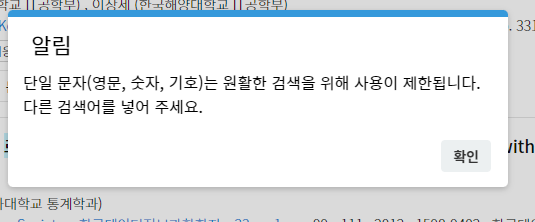

In [30]:
clean_data['검색질의어'] = clean_data['검색질의어'].fillna('None')

In [31]:
onestrData = clean_data[clean_data['검색질의어'].str.len() == 1]
filtered_df = onestrData[onestrData['검색질의어'].str.match(r'[a-zA-Z0-9!@#$%^&*()_+\\-\\/]')]
filtered_df

,사용자IP,로그등록시간,서비스 종류,콘텐츠 종류,웹/모바일 구분,이전URL,요청URL,검색질의어,조회 컨텐츠,유입 검색어,이전URL 도메인
87556,103.107.***.196,2022-06-15 20:28:00,상세보기,특허,모바일,None,/mobile/srch/selectPORSrchPatent.do,1,None,None,None
87559,103.107.***.196,2022-06-16 03:59:28,검색,논문,웹,None,/srch/selectPORSrchArticleList.do,1,None,None,None
87560,103.107.***.196,2022-06-16 03:59:31,검색,논문,웹,None,/srch/selectPORSrchArticleList.do,1,None,None,None
87563,103.107.***.196,2022-06-16 04:03:56,상세보기,특허,웹,None,/srch/selectPORSrchPatent.do,1,None,None,None
87566,103.107.***.196,2022-06-16 08:33:59,상세보기,특허,웹,None,/srch/selectPORSrchPatent.do,1,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
34082338,222.231.***.107,2022-09-20 11:40:44,검색,특허,웹,scienceon.kisti.re.kr,/srch/PORSrchPatentList.do,*,None,None,None
34082339,222.231.***.107,2022-09-20 11:40:46,검색,특허,웹,scienceon.kisti.re.kr,/srch/PORSrchPatentList.do,*,None,None,None
34957413,49.169.***.33,2022-04-11 19:20:03,검색,통합,웹,https://scienceon.kisti.re.kr/commons/util/originalView.do?cn=TRKO201200009414&dbt=TRKO&rn=,/srch/selectPORSrchTotal.do,9,None,None,scienceon.kisti.re.kr
34957414,49.169.***.33,2022-04-11 19:20:04,검색,통합,웹,https://scienceon.kisti.re.kr/commons/util/originalView.do?cn=TRKO201200009414&dbt=TRKO&rn=,/srch/selectPORSrchTotal.do,9,None,None,scienceon.kisti.re.kr


### [2] 단일 문자 사용한 IP 제거
검색질의어에 '/', 's', 'M', '1', 'A', 'w', '*', 'r', '8', '0', '\\', '4', '%', '5', 'd', '9' 포함 시 IP 제거

In [32]:
filtered_df['검색질의어'].unique()

array(['1', '0', '5', '/', '*', 'w', '8', 'r', 'd', '4', 's', '\\', '%',
       'A', 'M', '9'], dtype=object)

In [33]:
drop_ip = filtered_df[filtered_df['검색질의어'] != '*']['사용자IP'].unique()
clean_data = clean_data[~clean_data['사용자IP'].isin(drop_ip)]
clean_data.head()

,사용자IP,로그등록시간,서비스 종류,콘텐츠 종류,웹/모바일 구분,이전URL,요청URL,검색질의어,조회 컨텐츠,유입 검색어,이전URL 도메인
0,1.11.***.10,2022-02-13 19:43:47,상세보기,논문,웹,https://www.google.com/,/srch/selectPORSrchArticle.do,None,NPAP12584646,None,www.google.com
1,1.11.***.10,2022-02-13 19:43:59,원문보기,None,웹,https://scienceon.kisti.re.kr/srch/selectPORSrchArticle.do?cn=NPAP12584646&dbt=NPAP,/commons/util/originalView.do,None,None,None,scienceon.kisti.re.kr
2,1.11.***.10,2022-02-18 14:05:43,상세보기,동향,웹,https://www.google.com/,/srch/selectPORSrchTrend.do,None,SCTM00127293,None,www.google.com
3,1.11.***.10,2022-03-31 16:12:04,상세보기,논문,웹,https://www.google.com/,/srch/selectPORSrchArticle.do,None,JAKO201328053101572,None,www.google.com
4,1.11.***.10,2022-04-14 23:08:18,상세보기,보고서,웹,https://www.google.com/,/srch/selectPORSrchReport.do,None,KAR2012059269,None,www.google.com


In [34]:
clean_data.to_csv('clean_data.csv', index=False)

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing:2px; color:#5B9FF5; font-size:80%; text-align:left;padding: 0px; border-bottom: 3px solid #5B9FF5">조회 컨텐츠</p>

#### 콘텐츠 정보는 코드로 이루어져있고, 코드는 영문과 숫자의 조합으로 이루어져있다. 

#### 영문은 콘텐츠의 종류를 의 미하며, 숫자는 콘텐츠 고유 식별 번호이다.


### [1] 이전 URL 을 통해 추가로 조회 컨텐츠 추출 
조회 컨텐츠가 존재하지 않고, 서비스 종류가 로그인이나 검색이 아닌 경우, 

이전 URL에서 "do?cn=JAKO20191903349388"와 같이 ScienceOn 컨텐츠 정보가 포함된 경우에 이 코드를 추출하여,

**기존 조회 컨텐츠** 외에 추가로 조회 컨텐츠를 추출하고,

전체 조회 컨텐츠를 **추가 조회 컨텐츠 칼럼**을 생성하여 추가한다.

In [68]:
clean_data=pd.read_csv('clean_data.csv')

In [69]:
content_nan_data = clean_data.loc[((clean_data['이전URL']!='None') & (clean_data['조회 컨텐츠'].isna()))]
content_nan_data

,사용자IP,로그등록시간,서비스 종류,콘텐츠 종류,웹/모바일 구분,이전URL,요청URL,검색질의어,조회 컨텐츠,유입 검색어,이전URL 도메인
1,1.11.***.10,2022-02-13 19:43:59,원문보기,NaN,웹,https://scienceon.kisti.re.kr/srch/selectPORSrchArticle.do?cn=NPAP12584646&dbt=NPAP,/commons/util/originalView.do,NaN,NaN,NaN,scienceon.kisti.re.kr
16,1.11.***.100,2022-11-20 15:02:57,다운로드,NaN,웹,https://scienceon.kisti.re.kr/srch/selectPORSrchArticle.do?cn=JAKO200415875832431&dbt=NART,/cm/file/fileDownload.do,NaN,NaN,NaN,scienceon.kisti.re.kr
17,1.11.***.100,2022-11-20 15:03:09,원문보기,NaN,웹,https://scienceon.kisti.re.kr/srch/selectPORSrchArticleOrgnl.do?cn=JAKO200415875832431&dbt=NART,/commons/util/originalView.do,NaN,NaN,NaN,scienceon.kisti.re.kr
19,1.11.***.100,2022-11-20 15:05:28,다운로드,NaN,웹,https://scienceon.kisti.re.kr/srch/selectPORSrchArticle.do?cn=JAKO200415875832431&dbt=NART,/cm/file/fileDownload.do,NaN,NaN,NaN,scienceon.kisti.re.kr
20,1.11.***.100,2022-11-20 15:05:29,다운로드,NaN,웹,https://scienceon.kisti.re.kr/srch/selectPORSrchArticle.do?cn=JAKO200415875832431&dbt=NART,/cm/file/fileDownload.do,NaN,NaN,NaN,scienceon.kisti.re.kr
...,...,...,...,...,...,...,...,...,...,...,...
25636573,91.240.***.252,2022-12-31 20:41:17,상세보기,논문,웹,NaN,/srch/selectPORSrchArticle.do,NaN,NaN,NaN,NaN
25636574,91.240.***.252,2022-12-31 20:41:18,상세보기,논문,웹,NaN,/srch/selectPORSrchArticle.do,NaN,NaN,NaN,NaN
25636575,91.240.***.252,2022-12-31 20:41:19,상세보기,논문,웹,NaN,/srch/selectPORSrchArticle.do,NaN,NaN,NaN,NaN
25636576,91.240.***.252,2022-12-31 20:41:20,상세보기,논문,웹,NaN,/srch/selectPORSrchArticle.do,NaN,NaN,NaN,NaN


In [70]:
content_nan_data['서비스 종류'].unique()

array(['원문보기', '다운로드', '검색', '로그인', '상세보기'], dtype=object)

In [71]:
def get_content(url):
    if type(url) == str and '.do?cn=' in url :
        match = re.search(r'cn=([^&]+)', url)
        if match:
            extracted_text = match.group(1)            
            return extracted_text
    else:
        return np.nan

In [72]:
target_data = clean_data[(~clean_data['서비스 종류'].isin(['로그인', '검색']) & (clean_data['조회 컨텐츠'].isna()))]
target_data['서비스 종류'].unique()


array(['원문보기', '다운로드', '상세보기'], dtype=object)

In [73]:
clean_data['추가 조회 컨텐츠'] = clean_data['조회 컨텐츠']
clean_data.loc[target_data.index, '추가 조회 컨텐츠'] = target_data['이전URL'].apply(get_content)
clean_data[clean_data['조회 컨텐츠'].isna()]

,사용자IP,로그등록시간,서비스 종류,콘텐츠 종류,웹/모바일 구분,이전URL,요청URL,검색질의어,조회 컨텐츠,유입 검색어,이전URL 도메인,추가 조회 컨텐츠
1,1.11.***.10,2022-02-13 19:43:59,원문보기,NaN,웹,https://scienceon.kisti.re.kr/srch/selectPORSrchArticle.do?cn=NPAP12584646&dbt=NPAP,/commons/util/originalView.do,NaN,NaN,NaN,scienceon.kisti.re.kr,NPAP12584646
16,1.11.***.100,2022-11-20 15:02:57,다운로드,NaN,웹,https://scienceon.kisti.re.kr/srch/selectPORSrchArticle.do?cn=JAKO200415875832431&dbt=NART,/cm/file/fileDownload.do,NaN,NaN,NaN,scienceon.kisti.re.kr,JAKO200415875832431
17,1.11.***.100,2022-11-20 15:03:09,원문보기,NaN,웹,https://scienceon.kisti.re.kr/srch/selectPORSrchArticleOrgnl.do?cn=JAKO200415875832431&dbt=NART,/commons/util/originalView.do,NaN,NaN,NaN,scienceon.kisti.re.kr,JAKO200415875832431
19,1.11.***.100,2022-11-20 15:05:28,다운로드,NaN,웹,https://scienceon.kisti.re.kr/srch/selectPORSrchArticle.do?cn=JAKO200415875832431&dbt=NART,/cm/file/fileDownload.do,NaN,NaN,NaN,scienceon.kisti.re.kr,JAKO200415875832431
20,1.11.***.100,2022-11-20 15:05:29,다운로드,NaN,웹,https://scienceon.kisti.re.kr/srch/selectPORSrchArticle.do?cn=JAKO200415875832431&dbt=NART,/cm/file/fileDownload.do,NaN,NaN,NaN,scienceon.kisti.re.kr,JAKO200415875832431
...,...,...,...,...,...,...,...,...,...,...,...,...
25636573,91.240.***.252,2022-12-31 20:41:17,상세보기,논문,웹,NaN,/srch/selectPORSrchArticle.do,NaN,NaN,NaN,NaN,NaN
25636574,91.240.***.252,2022-12-31 20:41:18,상세보기,논문,웹,NaN,/srch/selectPORSrchArticle.do,NaN,NaN,NaN,NaN,NaN
25636575,91.240.***.252,2022-12-31 20:41:19,상세보기,논문,웹,NaN,/srch/selectPORSrchArticle.do,NaN,NaN,NaN,NaN,NaN
25636576,91.240.***.252,2022-12-31 20:41:20,상세보기,논문,웹,NaN,/srch/selectPORSrchArticle.do,NaN,NaN,NaN,NaN,NaN


### [2] 비정상 조회 컨텐츠 분류
#### [2-1] 정상 조회 컨텐츠 코드정보


콘텐츠 정보는 코드로 이루어져있고, 코드는 영문과 숫자의 조합으로 이루어져있다. 영문은 콘텐츠의 종류를 의 미하며, 숫자는 콘텐츠 고유 식별 번호이다.
##### **특허** 

    - USP 미국특허
    - KOR 한국특허 
    - WPA 국제특허 
    - EPA 유럽특허 
    - JPA 일본특허 
    - USA 미국특허 

##### **논문**

    - JAKO 국내논문
    - NART 국내/해외논문 
    - DIKO 학위논문 - 국내 
    - ATN OA논문
    - PRE OA논문
    - NPAP 논문(학술회의-국내/해외)
    - ART 국내논문 
    - CFKO 국내 학술대회 논문 

##### **보고서** 

    - TRKO 보고서(국가R&D)
    - KAR 분석/정책/시장보고서
    - KOSEN 분석/정책/시장보고서
    - DI 분석/정책/시장보고서
    - IS 해외정책이슈분석리포트
    - IWR 분석/정책/시장보고서
    - KMR 분석/정책/시장보고서

##### **동향** 

    - SCTM 사이언스타임즈 
    - IWT 오픈액세스동향
    - GTB 해외과학기술동향 
    - GT 과학기술정책동향 
    - KISTI 한국과학기술정보연구원
    - ETRI 한국전자통신연구원(ETRI) 
    - DT 과학기술정책동향 
    - TT 과학기술정책동향
    - STEPI 과학기술정책연구원(STEPI)

#### **연구기관** 

    - K00 연구기관 
    - ADPER 연구자
    - FNCT 기능 

#### [2-2] 비정상 조회 컨텐츠 목록 

##### **단순 오타 유형** 

- 대문자를 소문자로 표현 [jako]
    - jako200833155749899 -> JAKO200833155749899
- 문자 't' 가 잘못 삽입된 경우 [tDIKO, tJAKO, tNART ]
    - tDIKO0014446997 -> DIKO0011005207, tJAKO201810063225909 -> JAKO201810063225909,  tNART56216624 -> NART56216624

##### **의미를 알수 없는 문자들** 

- 숫자로 이루어진 텍스트 
    - 2018240798142350, 2914, 693, 2018623606773640
- SQL 문 
    - CASE WHEN 9249=9249 THEN 9249 ELSE NULL END
- Javascript
    - &quot;&gt;&lt;javascript:alert(String.fromCharCode(88,83,83));&quot;&gt;
- 그 밖의 여러 비정상 텍스트 존재 
    - \..\..\..\..\..\..\..\..\..\..\..\..\windows\win.ini
    - 10.7317/pk.2016.40.6.907
    -  &quot;&apos;&gt;&lt;IMG SRC=&quot;/WF_XSRF6180.html&quot;&gt;


In [74]:
# 정상 코드 
correct_code = [
    'USP', 'KOR', 'WPA', 'EPA', 'JPA', 'USA',
    'JAKO', 'NART', 'DIKO', 'ATN', 'PRE', 'NPAP', 'ART', 'CFKO',
    'TRKO', 'KAR', 'KOSEN', 'DI', 'IS', 'IWR', 'KMR',
    'SCTM', 'IWT', 'GTB', 'GT', 'KISTI', 'ETRI', 'DT', 'TT', 'STEPI',
    'K00', 'ADPER', 'FNCT'
]
# 오타 코드 
invalid_code = ['tJAKO', 'tDIKO', 'jako', 'tNART']

### [3] 비정상 컨텐츠 분류 기준에 따른 조회 컨텐츠 이상치 처리

In [75]:
def content_process(text, correct_code):
    '''
    1. 식별코드로 시작하는 콘텐츠는 알파벳, 숫자로만 이루어지게 필터링 
    2. 오타 코드는 정상 식별코드 형태로 대체 
    3. 의미를 알 수 없는 콘텐츠는 '식별코드 외 콘텐츠' 로 대체
    '''
    
    if text in ['None', '', np.nan]:
        return text
    
    # 정상코드 처리
    correct_string = '|'.join(correct_code)
    correct_pattern = r'^(?:' + correct_string + r')([A-Za-z0-9]+)$'
    code_pattern = r'^(?:' + correct_string + r')'

    # 단순 오타 코드 처리
    simple_error_pattern = r'(?:t(JAKO|DIKO|NART))|jako'

    # 복잡한 오타 코드 처리
    complex_error_pattern1 = r'\b[A-Za-z0-9]*[0-9]\b'
    patterns = [pattern + r'\d+' for pattern in correct_code]
    complex_error_pattern2 = r'(' + '|'.join(patterns) + r')'

    # 정상 식별코드 처리
    if re.search(correct_pattern, text):
        text = re.search(correct_pattern, text).group()
    # 오타 식별코드 처리
    elif re.search(simple_error_pattern, text):
        match = re.search(simple_error_pattern, text)
        if match.group(1):
            text = match.group(1)
        elif match.group(0) == 'jako':
            text = 'JAKO'
        else:
            text = match.group(0)
    # 복잡한 오타를 정상 식별코드 수정
    elif re.search(code_pattern, text):
        if  re.search(complex_error_pattern1, text):
            text = re.search(complex_error_pattern1, text).group()
        elif re.search(complex_error_pattern2, text):
            text = re.search(complex_error_pattern2, text).group(1)
        else:
            text = re.search(code_pattern, text).group(0)
    else:
        text = '식별코드 외 콘텐츠'

    return text

In [76]:
clean_data['추가 조회 컨텐츠'].fillna('None', inplace=True)
clean_data['추가 조회 컨텐츠'] = clean_data['추가 조회 컨텐츠'].apply(lambda x : content_process(x,correct_code))
clean_data.head()

,사용자IP,로그등록시간,서비스 종류,콘텐츠 종류,웹/모바일 구분,이전URL,요청URL,검색질의어,조회 컨텐츠,유입 검색어,이전URL 도메인,추가 조회 컨텐츠
0,1.11.***.10,2022-02-13 19:43:47,상세보기,논문,웹,https://www.google.com/,/srch/selectPORSrchArticle.do,NaN,NPAP12584646,NaN,www.google.com,NPAP12584646
1,1.11.***.10,2022-02-13 19:43:59,원문보기,NaN,웹,https://scienceon.kisti.re.kr/srch/selectPORSrchArticle.do?cn=NPAP12584646&dbt=NPAP,/commons/util/originalView.do,NaN,NaN,NaN,scienceon.kisti.re.kr,NPAP12584646
2,1.11.***.10,2022-02-18 14:05:43,상세보기,동향,웹,https://www.google.com/,/srch/selectPORSrchTrend.do,NaN,SCTM00127293,NaN,www.google.com,SCTM00127293
3,1.11.***.10,2022-03-31 16:12:04,상세보기,논문,웹,https://www.google.com/,/srch/selectPORSrchArticle.do,NaN,JAKO201328053101572,NaN,www.google.com,JAKO201328053101572
4,1.11.***.10,2022-04-14 23:08:18,상세보기,보고서,웹,https://www.google.com/,/srch/selectPORSrchReport.do,NaN,KAR2012059269,NaN,www.google.com,KAR2012059269


기존 Nan 값이 [식별코드 외 콘텐츠] 로 처리되어 다시 전처리

In [77]:
cond = (clean_data['추가 조회 컨텐츠']=='식별코드 외 콘텐츠') & (clean_data['조회 컨텐츠'].isna())
na_index = clean_data[cond].index
clean_data.loc[na_index, '추가 조회 컨텐츠'] = np.nan

### [4] 식별코드 외 콘텐츠를 대량으로 조회한 IP 확인하여 제거

In [82]:
def plot_invalid_content(ip_data, title):
    plt.figure(figsize=(12, 6))
    plt.rc('font', family='Malgun Gothic')

    # 수평 막대 그래프
    plt.subplot(1, 2, 1)
    sns.barplot(x=ip_data.values, y=ip_data.index, palette='coolwarm')
    plt.title(title)
    plt.xlabel('조회 횟수')
    plt.ylabel('IP')

    # Scatter 그래프
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=ip_data.index, y=ip_data.values, size=ip_data.values, sizes=(50, 300), hue=ip_data.values, palette='coolwarm')
    plt.xticks(rotation=90)  # x축 레이블 회전
    plt.title(title)
    plt.xlabel('IP')
    plt.ylabel('조회 횟수')
    plt.show()


In [79]:
abnormal_df = clean_data[clean_data['추가 조회 컨텐츠']=='식별코드 외 콘텐츠']
abnormal_df.head()
print(len(abnormal_df))

4882


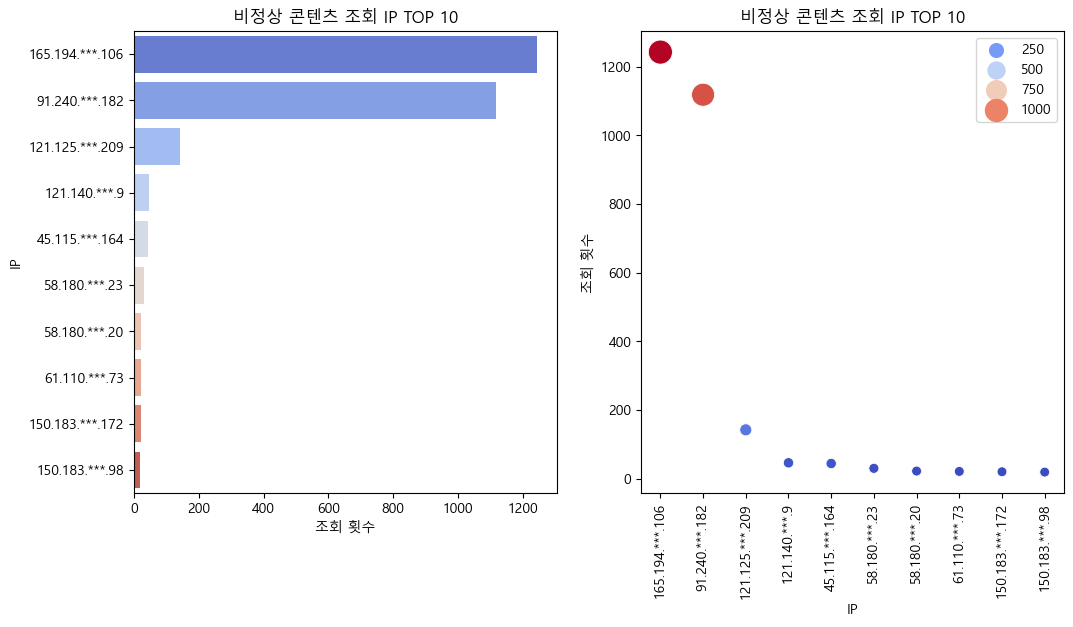

In [83]:
ab_vc =  abnormal_df['사용자IP'].value_counts()[:10]
plot_invalid_content(ab_vc , '비정상 콘텐츠 조회 IP TOP 10')

In [84]:
ab_vc

사용자IP
165.194.***.106    1242
91.240.***.182     1118
121.125.***.209     143
121.140.***.9        47
45.115.***.164       45
58.180.***.23        31
58.180.***.20        23
61.110.***.73        22
150.183.***.172      21
150.183.***.98       20
Name: count, dtype: int64

##### 165.194.***.106 
원문 URL 링크 : DOI : 10.7317/pk.2018.42.1.99 

식별코드 외 콘텐츠에 원문 URL 링크 비율이 많다 

In [85]:
clean_data.loc[((clean_data['사용자IP']==ab_vc.index[0])&(clean_data['추가 조회 컨텐츠']=='식별코드 외 콘텐츠')), '조회 컨텐츠']

13309528    10.7317/pk.2016.40.6.992
13311330     10.7317/pk.2018.42.1.87
13314929    10.7317/pk.2018.42.2.339
13316155    10.7317/pk.2018.42.3.504
13322039    10.7317/pk.2018.42.2.197
                      ...           
13348353            2018451940815240
13362706    10.7317/pk.2018.42.4.649
13362841    10.7317/pk.2018.42.3.347
13368285     10.7317/pk.2018.42.1.99
13397775    10.7317/pk.2018.42.3.521
Name: 조회 컨텐츠, Length: 1242, dtype: object

#### 91.240.***.182 

(CASE WHEN 8252=8252 THEN 8252 ELSE NULL END) 과 같은 SQL문 조회

In [86]:
clean_data.loc[((clean_data['사용자IP']==ab_vc.index[1])&(clean_data['추가 조회 컨텐츠']=='식별코드 외 콘텐츠')), '조회 컨텐츠']

25632248                                             6777
25632249                                             8028
25632250                                             5035
25632256                                            -7266
25632257                                            -4868
                                ...                      
25635557    (CASE WHEN 8252=8252 THEN 8252 ELSE NULL END)
25635563                                             6579
25635566                                            -1166
25635567    (CASE WHEN 1802=9940 THEN 1802 ELSE NULL END)
25635568    (CASE WHEN 3075=3075 THEN 3075 ELSE NULL END)
Name: 조회 컨텐츠, Length: 1118, dtype: object

### [5] 자바스크립트, SQL문을 조회한 IP 제거 

In [87]:
pattern = r'CASE WHEN|javascript'
abnormal_data = clean_data[clean_data['조회 컨텐츠'].fillna('').str.contains(pattern, case=False, regex=True)]
abnormal_data.head(10)

,사용자IP,로그등록시간,서비스 종류,콘텐츠 종류,웹/모바일 구분,이전URL,요청URL,검색질의어,조회 컨텐츠,유입 검색어,이전URL 도메인,추가 조회 컨텐츠
24319081,45.115.***.164,2022-04-24 00:38:11,상세보기,논문,웹,"https://scienceon.kisti.re.kr/srch/selectPORSrchArticle.do?cn=""><javascript:alert(String.fromCharCode(88,83,83));"">",/srch/selectPORSrchArticle.do,NaN,"&quot;&gt;&lt;javascript:alert(String.fromCharCode(88,83,83));&quot;&gt;",NaN,scienceon.kisti.re.kr,식별코드 외 콘텐츠
24319082,45.115.***.164,2022-04-24 00:38:14,상세보기,논문,웹,https://scienceon.kisti.re.kr/srch/selectPORSrchArticle.do?cn=%22%3e%3cjavascript%3aalert(String.fromCharCode(88%2c83%2c83))%3b%22%3e,/srch/selectPORSrchArticle.do,NaN,"&quot;&gt;&lt;javascript:alert(String.fromCharCode(88,83,83));&quot;&gt;",NaN,scienceon.kisti.re.kr,식별코드 외 콘텐츠
25632286,91.240.***.182,2022-11-11 06:29:34,상세보기,특허,모바일,NaN,/mobile/srch/selectPORSrchPatent.do,NaN,(CASE WHEN 5047=7120 THEN 5047 ELSE NULL END),NaN,NaN,식별코드 외 콘텐츠
25632287,91.240.***.182,2022-11-11 06:29:36,상세보기,특허,모바일,NaN,/mobile/srch/selectPORSrchPatent.do,NaN,(CASE WHEN 3777=3777 THEN 3777 ELSE NULL END),NaN,NaN,식별코드 외 콘텐츠
25632289,91.240.***.182,2022-11-11 06:30:10,상세보기,특허,웹,NaN,/srch/selectPORSrchPatent.do,NaN,(CASE WHEN 4853=8227 THEN 4853 ELSE NULL END),NaN,NaN,식별코드 외 콘텐츠
25632290,91.240.***.182,2022-11-11 06:30:13,상세보기,특허,웹,NaN,/srch/selectPORSrchPatent.do,NaN,(CASE WHEN 7317=7317 THEN 7317 ELSE NULL END),NaN,NaN,식별코드 외 콘텐츠
25632291,91.240.***.182,2022-11-11 06:30:16,상세보기,논문,웹,NaN,/srch/selectPORSrchArticle.do,NaN,(CASE WHEN 6618=1490 THEN 6618 ELSE NULL END),NaN,NaN,식별코드 외 콘텐츠
25632292,91.240.***.182,2022-11-11 06:30:20,상세보기,논문,웹,NaN,/srch/selectPORSrchArticle.do,NaN,(CASE WHEN 3261=3261 THEN 3261 ELSE NULL END),NaN,NaN,식별코드 외 콘텐츠
25632293,91.240.***.182,2022-11-11 06:30:21,상세보기,논문,웹,NaN,/srch/selectPORSrchArticle.do,NaN,(CASE WHEN 5399=3868 THEN 5399 ELSE NULL END),NaN,NaN,식별코드 외 콘텐츠
25632294,91.240.***.182,2022-11-11 06:30:24,상세보기,논문,웹,NaN,/srch/selectPORSrchArticle.do,NaN,(CASE WHEN 2937=2937 THEN 2937 ELSE NULL END),NaN,NaN,식별코드 외 콘텐츠


In [88]:
abnormal_data['서비스 종류'].unique()

array(['상세보기', '원문보기'], dtype=object)

In [89]:
invalid_v_cnt = abnormal_data['사용자IP'].value_counts()
invalid_v_cnt

사용자IP
91.240.***.182    549
45.115.***.164      2
91.240.***.190      2
Name: count, dtype: int64

### [6] 불분명한 콘텐츠를 조회 한 IP 제거

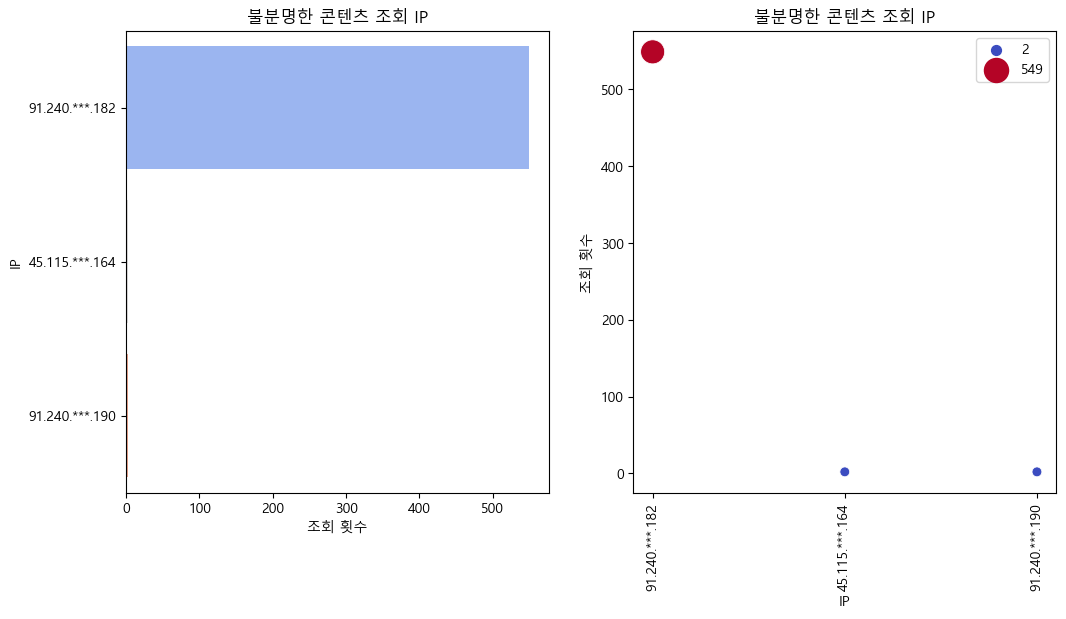

In [90]:
plot_invalid_content(invalid_v_cnt, '불분명한 콘텐츠 조회 IP')


In [91]:
clean_data = clean_data[~clean_data['사용자IP'].isin(list(invalid_v_cnt.index))]
clean_data

,사용자IP,로그등록시간,서비스 종류,콘텐츠 종류,웹/모바일 구분,이전URL,요청URL,검색질의어,조회 컨텐츠,유입 검색어,이전URL 도메인,추가 조회 컨텐츠
0,1.11.***.10,2022-02-13 19:43:47,상세보기,논문,웹,https://www.google.com/,/srch/selectPORSrchArticle.do,NaN,NPAP12584646,NaN,www.google.com,NPAP12584646
1,1.11.***.10,2022-02-13 19:43:59,원문보기,NaN,웹,https://scienceon.kisti.re.kr/srch/selectPORSrchArticle.do?cn=NPAP12584646&dbt=NPAP,/commons/util/originalView.do,NaN,NaN,NaN,scienceon.kisti.re.kr,NPAP12584646
2,1.11.***.10,2022-02-18 14:05:43,상세보기,동향,웹,https://www.google.com/,/srch/selectPORSrchTrend.do,NaN,SCTM00127293,NaN,www.google.com,SCTM00127293
3,1.11.***.10,2022-03-31 16:12:04,상세보기,논문,웹,https://www.google.com/,/srch/selectPORSrchArticle.do,NaN,JAKO201328053101572,NaN,www.google.com,JAKO201328053101572
4,1.11.***.10,2022-04-14 23:08:18,상세보기,보고서,웹,https://www.google.com/,/srch/selectPORSrchReport.do,NaN,KAR2012059269,NaN,www.google.com,KAR2012059269
...,...,...,...,...,...,...,...,...,...,...,...,...
25636626,91.240.***.73,2022-05-18 21:24:21,상세보기,특허,웹,https://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&query=%ED%83%AD+forming%2C+cutting+tap+tool&oquery=%ED%83%AD+forming&tqi=hogDMwprvxZsskXGLvsssssst7C-316644,/srch/selectPORSrchPatent.do,NaN,USP2007077241088,"탭+forming,+cutting+tap+tool",search.naver.com,USP2007077241088
25636627,91.240.***.73,2022-05-20 19:45:54,상세보기,특허,웹,https://www.google.com/,/srch/selectPORSrchPatent.do,NaN,KOR1019980015276,NaN,www.google.com,KOR1019980015276
25636628,91.240.***.8,2022-08-17 22:25:11,상세보기,보고서,웹,NaN,/srch/selectPORSrchReport.do,NaN,TRKO201800042334,NaN,NaN,TRKO201800042334
25636629,91.240.***.89,2022-08-30 13:50:07,상세보기,논문,웹,https://www.google.com/,/srch/selectPORSrchArticle.do,NaN,DIKO0014916091,NaN,www.google.com,DIKO0014916091


## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing:2px; color:#5B9FF5; font-size:80%; text-align:left;padding: 0px; border-bottom: 3px solid #5B9FF5">컨텐츠 코드</p>

### [1] 컨텐츠 코드 칼럼 생성 

조회 컨텐츠의 데이터가 등록번호로 표시되며, 이 번호에 알파벳으로 표시된 출처 정보 텍스트만 추출

In [92]:
pattern = r'^(?:' + '|'.join(correct_code) + r')'

clean_data['컨텐츠 코드'] = clean_data['추가 조회 컨텐츠'].fillna('None').apply(lambda text: re.search(pattern, text).group(0) if (re.search(pattern, text))  else '-')
clean_data.loc[clean_data['추가 조회 컨텐츠'].isna(), '컨텐츠 코드'] = np.nan
clean_data['컨텐츠 코드'].unique()

array(['NPAP', 'SCTM', 'JAKO', 'KAR', 'TRKO', 'KOR', 'ADPER', 'DIKO', '-',
       'GTB', 'KOSEN', 'NART', 'ART', 'GT', 'USP', 'FNCT', 'KMR', 'IS',
       'DT', 'IWT', 'ATN', 'IWR', 'USA', 'EPA', 'DI', 'JPA', 'WPA', 'TT',
       'KISTI', 'K00', nan, 'CFKO', 'ETRI', 'PRE', 'STEPI'], dtype=object)

In [93]:
clean_data.head()

,사용자IP,로그등록시간,서비스 종류,콘텐츠 종류,웹/모바일 구분,이전URL,요청URL,검색질의어,조회 컨텐츠,유입 검색어,이전URL 도메인,추가 조회 컨텐츠,컨텐츠 코드
0,1.11.***.10,2022-02-13 19:43:47,상세보기,논문,웹,https://www.google.com/,/srch/selectPORSrchArticle.do,NaN,NPAP12584646,NaN,www.google.com,NPAP12584646,NPAP
1,1.11.***.10,2022-02-13 19:43:59,원문보기,NaN,웹,https://scienceon.kisti.re.kr/srch/selectPORSrchArticle.do?cn=NPAP12584646&dbt=NPAP,/commons/util/originalView.do,NaN,NaN,NaN,scienceon.kisti.re.kr,NPAP12584646,NPAP
2,1.11.***.10,2022-02-18 14:05:43,상세보기,동향,웹,https://www.google.com/,/srch/selectPORSrchTrend.do,NaN,SCTM00127293,NaN,www.google.com,SCTM00127293,SCTM
3,1.11.***.10,2022-03-31 16:12:04,상세보기,논문,웹,https://www.google.com/,/srch/selectPORSrchArticle.do,NaN,JAKO201328053101572,NaN,www.google.com,JAKO201328053101572,JAKO
4,1.11.***.10,2022-04-14 23:08:18,상세보기,보고서,웹,https://www.google.com/,/srch/selectPORSrchReport.do,NaN,KAR2012059269,NaN,www.google.com,KAR2012059269,KAR


In [94]:
clean_data.reset_index(drop=True).to_csv('clean_data_fin.csv', index=False)

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing:2px; color:#5B9FF5; font-size:80%; text-align:left;padding: 0px; border-bottom: 3px solid #5B9FF5">콘텐츠 종류</p>

콘텐츠 종류가 Nan 값이지만 컨텐츠 코드가 존재한다면  컨텐츠 코드를 아용하여 콘텐츠 종류 데이터 추출할려 했으나 컨텐츠 코드 별 콘텐츠 종류가 유일하지 않고 다양함

In [ ]:
content_type_df = pd.DataFrame(clean_data[['콘텐츠 종류', '컨텐츠 코드']].value_counts())
content_type_df

count
콘텐츠 종류 컨텐츠 코드         
논문     NART    4944172
       JAKO    4368729
특허     USP     2195476
보고서    TRKO    1899121
논문     DIKO    1846929
...                ...
       GT            1
동향     KAR           1
       JAKO          1
논문     USP           1
       JPA           1

[105 rows x 1 columns]

In [ ]:
clean_data.groupby('콘텐츠 종류')['컨텐츠 코드'].unique()

콘텐츠 종류
기능                                                                                                     [FNCT, -, USP, JAKO]
논문              [NPAP, JAKO, DIKO, -, NART, ART, ATN, CFKO, PRE, TRKO, DI, KAR, KOSEN, KOR, ADPER, SCTM, USP, USA, JPA, GT]
동향       [SCTM, GTB, GT, -, IS, DT, IWT, TT, KISTI, ETRI, STEPI, KAR, JAKO, TRKO, DIKO, KOR, USA, WPA, EPA, NART, ATN, PRE]
보고서                            [KAR, TRKO, KOSEN, -, KMR, IWR, DI, KOR, NPAP, JAKO, SCTM, ART, ADPER, DIKO, NART, ATN, PRE]
서비스                                                                                                                     [-]
연구데이터                                                                                                                   [-]
연구자                                                                                                  [ADPER, -, JAKO, DIKO]
통합                                      [-, JAKO, NART, TRKO, KAR, ART, DIKO, KOR, KOSEN, NPAP, SCTM, USP, GT, CFKO, ADPER]
특

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing:2px; color:#5B9FF5; font-size:80%; text-align:left;padding: 0px; border-bottom: 3px solid #5B9FF5">직종 컬럼 추가</p>



ScienceON 로그 데이터를 기반으로 한 이용자 행동 패턴 분석 및 분류(2022, 조승환) 논문에서 정리한 직종별 월별, 시간별 특징은 다음과 같습니다.

- 연구원

    - 가장 이용량 많은 월: 7-8월

    - 가장 이용하지 않는 월: 9, 10, 11, 12월

    - 가장 이용량 많은 시간대:  14-16 이용량이 많음

- 컨설팅:

    - 가장 이용량 많은 월: 9-11월

    - 가장 이용하지 않는 월: 1, 2, 3, 4, 5월

    - 가장 이용량 많은 시간대: 오전 7시, 20시, 21시간대가 많음

- 학생:

    - 가장 이용량 많은 월: 3-5월, 9-11월

    - 가장 이용하지 않는 월: 1, 2, 6, 7, 8월

    - 가장 이용량 많은 시간대: 15시, 16시간대가 많음

- 교수:

    - 가장 이용량 많은 월: 1, 2, 3, 4, 12월

    - 가장 이용하지 않는 월: 5, 10월

    - 가장 이용량 많은 시간대: 10-11시간대가 많음

- 사무직:

    - 가장 이용량 많은 월: 10월

    - 가장 이용하지 않는 월: 2, 3, 5, 11, 12월

    - 가장 이용량 많은 시간대: 10시간대, 14시간대가 많음

- 전문직:

    - 가장 이용량 많은 월: 1-5월, 9월

    - 가장 이용량 많은 시간대: 9-5시, 10-11시간대가 많음

    - 가장 이용하지 않는 월: 6, 7, 8, 11, 12월


In [1124]:
condition_data = {
    'researcher': {
        'months': [7, 8],
        'hours': [14, 15, 16, 10, 11],
        'excep_months': [10, 11, 12],  
        'excep_hours': [12, 18, 19, 3, 4, 5]

    },
    'consultant': {
        'months': [9, 10, 11],
        'hours': [7, 8, 9, 20, 21],
        'excep_months': [1, 2, 3, 4, 5],  
        'excep_hours': [12, 17, 23, 1, 2, 3, 4, 5, 6]
    },
    'student': {
        'months': [3, 4, 5, 10, 9],
        'hours': [13, 14, 15, 16, 17],
        'excep_months': [1, 2, 6, 7, 8],
        'excep_hours': [4, 5, 6, 7, 8]

    },
    'professor': {
        'months': [12, 1, 3, 2],
        'hours': [10, 11, 14, 15, 16],
        'excep_months': [5, 10, 7],
        'excep_hours': [12, 18, 3, 4, 5]

    },
    'officer': {
        'months': [10, 6, 8, 4, 1],
        'hours': [10, 11, 14, 15, 16],
        'excep_months': [2, 11, 12],
        'excep_hours': [12, 18,19, 3, 4, 5]

    },
    'specialist': {
        'months': [5, 8, 3, 4, 1],
        'hours': [10, 11, 14, 15, 16],
        'excep_months': [6, 8, 12],
        'excep_hours': [12, 13, 19, 1, 2, 5]

    }
}

In [1669]:
def find_top_usage_by_ip(data):
    # 데이터프레임을 IP 주소로 그룹화
    grouped = data.groupby('사용자IP')

    # 결과를 저장할 리스트 초기화
    results = []

    # 각 IP 주소별로 가장 많이 이용한 월 및 시간대 찾기
    for ip, group in grouped:
        # 등록시간 컬럼을 datetime 형식으로 변환
        group['등록시간'] = pd.to_datetime(group['로그등록시간'])

        # 가장 많이 이용한 월 top 5를 찾기
        top_months = group['등록시간'].dt.month.value_counts().index[:3].tolist()

        # 가장 많이 이용한 시간대 top 5를 찾기
        top_times = group['등록시간'].dt.hour.value_counts().index[:6].tolist()

        # 결과를 리스트에 추가
        results.append({'사용자IP': ip, '가장많이이용한월': top_months, '가장많이이용한시간대': top_times})

    # 결과를 데이터프레임으로 변환
    result_df = pd.DataFrame(results)

    return result_df

In [1671]:
result_df = find_top_usage_by_ip(clean_data)

result_df

,사용자IP,가장많이이용한월,가장많이이용한시간대
0,1.11.***.10,"[2, 9, 3]","[19, 14, 16, 23, 2, 22]"
1,1.11.***.100,"[11, 12, 8]","[15, 10, 12, 21, 17, 20]"
2,1.11.***.102,"[11, 4, 3]","[23, 17, 22, 19, 1]"
3,1.11.***.103,"[10, 7, 11]","[22, 19, 21, 20, 14, 8]"
4,1.11.***.104,"[11, 4, 12]","[16, 19, 22, 15, 18, 12]"
...,...,...,...
169821,91.240.***.69,"[3, 1]","[3, 4, 23]"
169822,91.240.***.7,[1],[1]
169823,91.240.***.73,"[3, 5, 1]","[21, 18, 23, 17, 15, 16]"
169824,91.240.***.8,[8],[22]


In [1740]:
def classify_occupation(row):
    if all(month in row['가장많이이용한월'] for month in condition_data['researcher']['months']) and all(month not in row['가장많이이용한월'] for month in condition_data['researcher']['months']) and all(hour in row['가장많이이용한시간대'] for hour in condition_data['researcher']['hours']):
        return 'researcher'
    elif all(month in row['가장많이이용한월'] for month in condition_data['consultant']['months']) and all(month not in row['가장많이이용한월'] for month in condition_data['consultant']['excep_months']) and all(hour in row['가장많이이용한시간대'] for hour in condition_data['consultant']['hours']):
        return 'consultant'
    elif all(month in row['가장많이이용한월'] for month in condition_data['student']['months']) and all(month not in row['가장많이이용한월'] for month in condition_data['student']['excep_months']) and all(hour in row['가장많이이용한시간대'] for hour in condition_data['student']['hours']):
        return 'student'
    elif all(month in row['가장많이이용한월'] for month in condition_data['professor']['months']) and all(month not in row['가장많이이용한월'] for month in condition_data['professor']['excep_months']) and all(hour in row['가장많이이용한시간대'] for hour in condition_data['professor']['hours']):
        return 'professor'
    elif all(month in row['가장많이이용한월'] for month in condition_data['officer']['months']) and all(month not in row['가장많이이용한월'] for month in condition_data['officer']['excep_months']) and all(hour in row['가장많이이용한시간대'] for hour in condition_data['officer']['hours']):
        return 'officer'
    elif all(month in row['가장많이이용한월'] for month in condition_data['specialist']['months']) and all(month not in row['가장많이이용한월'] for month in condition_data['specialist']['excep_months']) and all(hour in row['가장많이이용한시간대'] for hour in condition_data['specialist']['hours']):
        return 'specialist'
    else:
        return 'unclassified'


In [1741]:
result_df['직종'] = result_df.apply(classify_occupation, axis=1)

시각화

In [1673]:
def plot_service_pie_chart(service_counts, title, islabel=True):
    # 팔레트 및 색상 설정
    palette = sns.color_palette("coolwarm", len(service_counts))
    font_color = '#525252'

    # 그래프 생성
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_facecolor('none')  # 배경색을 투명하게 설정
    percent = (service_counts.values / sum(service_counts.values) * 100).round(2)

    # 파이 차트 생성
    label = [f'{p}%' for p in percent] if islabel else [''] * len(service_counts)

    if islabel:
        wedges, texts, autotexts = ax.pie(service_counts, colors=palette, labels=label, startangle=30, wedgeprops=dict(width=.5), autopct='')
    else:
        wedges, texts, autotexts = ax.pie(service_counts, colors=palette, startangle=30, wedgeprops=dict(width=.5), autopct='')

    # 그래프 타이틀 설정
    title = plt.title(title, fontsize=16, color=font_color)
    title.set_position([.5, 1.02])
    mpl.rcParams['font.size'] = 16.0

    # 범례 설정
    legend = plt.legend(wedges, [x for x in service_counts.index], title='직종', bbox_to_anchor=(1.3, .87), loc='upper left', ncol=1, fancybox=True)
    legend.get_title().set_color(font_color)

    # 비율을 출력
    total = sum(service_counts)
    percentages = [(count / total * 100) for count in service_counts]
    for i, p in enumerate(wedges):
        print(f'{service_counts.index[i]}: {percentages[i]:.2f}%')

    # 그래프 출력
    plt.show()


유클리디안 거리를 이용해 직업 예상

In [1917]:
def calculate_occupation_similarity(user_data, condition_data):

    user_months = set(user_data['가장많이이용한월'])
    user_hours = set(user_data['가장많이이용한시간대'])

    if len(list(user_months))<3 | len(list(user_hours))<5:
        return '기타'
    
    min_distance = float('inf')
    closest_occupation = None
    
    for occupation, condition in condition_data.items():
        condition_months = set(condition['months'])
        condition_hours = set(condition['hours'])
        
        # 많이 이용하지 않는 달을 고려하여 월 차이 계산
        excep_months = set(condition.get('excep_months', []))
        month_difference = len(user_months.symmetric_difference(condition_months)) + len(user_months.intersection(excep_months)) * 2
        
        excep_hours = set(condition.get('excep_hours', []))
        hour_difference = len(user_hours.symmetric_difference(condition_hours))  + len(user_hours.intersection(excep_hours)) * 2
        total_difference = month_difference + hour_difference 
        
        

        # 최소 거리 찾기
        if total_difference < min_distance:
            min_distance = total_difference
            closest_occupation = occupation

    if min_distance > 10:
        return '기타'
    # print(min_distance)
    
    
    return closest_occupation

In [1918]:
result_df['예상 직종'] = result_df.apply(lambda x: calculate_occupation_similarity(x, condition_data), axis=1)

기타: 76.60%
student: 8.37%
professor: 6.10%
researcher: 4.38%
consultant: 1.72%
officer: 1.60%
specialist: 1.22%


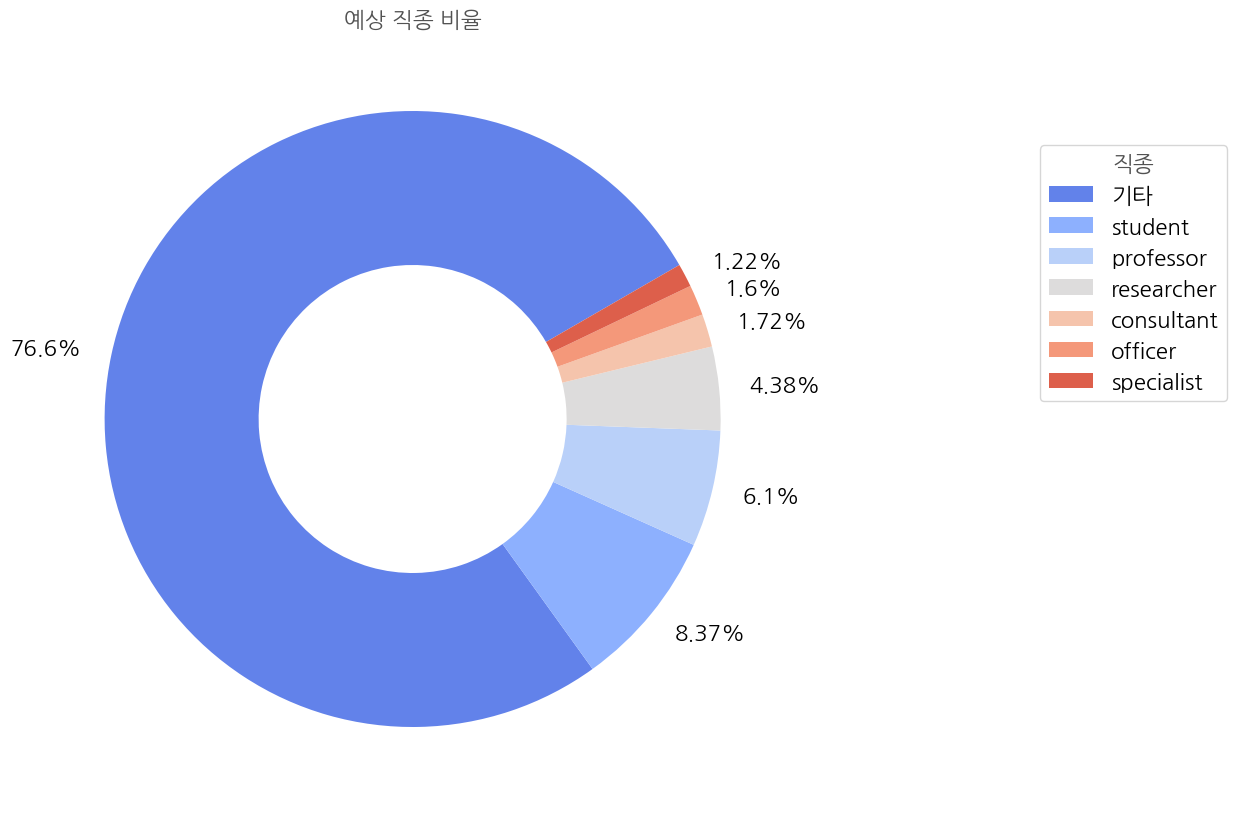

In [1919]:
plot_service_pie_chart(result_df['예상 직종'].value_counts(), '예상 직종 비율')

In [1920]:
clean_data['예상 직종'] = clean_data['사용자IP'].map(result_df.set_index('사용자IP')['예상 직종'])
clean_data

,사용자IP,로그등록시간,서비스 종류,콘텐츠 종류,웹/모바일 구분,이전URL,요청URL,검색질의어,조회 컨텐츠,유입 검색어,이전URL 도메인,추가 조회 컨텐츠,컨텐츠 코드,예상 직종,활동 시간대
0,1.11.***.10,2022-02-13 19:43:47,상세보기,논문,웹,https://www.google.com/,/srch/selectPORSrchArticle.do,NaN,NPAP12584646,NaN,www.google.com,NPAP12584646,NPAP,professor,2
1,1.11.***.10,2022-02-13 19:43:59,원문보기,NaN,웹,https://scienceon.kisti.re.kr/srch/selectPORSrchArticle.do?cn=NPAP12584646&dbt=NPAP,/commons/util/originalView.do,NaN,NaN,NaN,scienceon.kisti.re.kr,NPAP12584646,NPAP,professor,2
2,1.11.***.10,2022-02-18 14:05:43,상세보기,동향,웹,https://www.google.com/,/srch/selectPORSrchTrend.do,NaN,SCTM00127293,NaN,www.google.com,SCTM00127293,SCTM,professor,2
3,1.11.***.10,2022-03-31 16:12:04,상세보기,논문,웹,https://www.google.com/,/srch/selectPORSrchArticle.do,NaN,JAKO201328053101572,NaN,www.google.com,JAKO201328053101572,JAKO,professor,3
4,1.11.***.10,2022-04-14 23:08:18,상세보기,보고서,웹,https://www.google.com/,/srch/selectPORSrchReport.do,NaN,KAR2012059269,NaN,www.google.com,KAR2012059269,KAR,professor,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25633224,91.240.***.73,2022-05-18 21:24:21,상세보기,특허,웹,https://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&query=%ED%83%AD+forming%2C+cutting+tap+tool&oquery=%ED%83%AD+forming&tqi=hogDMwprvxZsskXGLvsssssst7C-316644,/srch/selectPORSrchPatent.do,NaN,USP2007077241088,"탭+forming,+cutting+tap+tool",search.naver.com,USP2007077241088,USP,specialist,5
25633225,91.240.***.73,2022-05-20 19:45:54,상세보기,특허,웹,https://www.google.com/,/srch/selectPORSrchPatent.do,NaN,KOR1019980015276,NaN,www.google.com,KOR1019980015276,KOR,specialist,5
25633226,91.240.***.8,2022-08-17 22:25:11,상세보기,보고서,웹,NaN,/srch/selectPORSrchReport.do,NaN,TRKO201800042334,NaN,NaN,TRKO201800042334,TRKO,기타,8
25633227,91.240.***.89,2022-08-30 13:50:07,상세보기,논문,웹,https://www.google.com/,/srch/selectPORSrchArticle.do,NaN,DIKO0014916091,NaN,www.google.com,DIKO0014916091,DIKO,기타,8


In [1921]:
def visualize_activity_by_time(data, title):
    # 로그 등록 시간 컬럼을 datetime 형식으로 변환
    data['로그등록시간'] = pd.to_datetime(data['로그등록시간'])

    time_bins = pd.date_range(start='00:00:00', end='23:59:59', freq='1H').time

    # 활동 시간대에 따라 데이터 그룹화
    # data['활동 시간대'] = data['로그등록시간'].dt.time.apply(
    #     lambda x: next((tb for tb in time_bins if x < tb), time_bins[-1])
    # )

    data['활동 시간대'] = data['로그등록시간'].dt.hour


    # 활동 시간대별 활동 횟수 계산
    activity_by_time = data['활동 시간대'].value_counts().sort_index()

    palette = sns.color_palette("coolwarm", len(activity_by_time))

    # 시각화
    activity_by_time.plot(kind='bar', figsize=(12, 6), color=palette)
    plt.title(title)
    plt.xlabel('활동 시간대')
    plt.ylabel('활동 횟수')
    plt.xticks(rotation=45)
    plt.show()

In [1922]:
def visualize_monthly_content_percentage(data, title):
    # 로그 등록 시간 컬럼을 datetime 형식으로 변환
    data['로그등록시간'] = pd.to_datetime(data['로그등록시간'])


    data['활동 시간대'] = data['로그등록시간'].dt.month

    # 활동 시간대별 활동 횟수 계산
    activity_by_time = data['활동 시간대'].value_counts().sort_index()

    palette = sns.color_palette("coolwarm", len(activity_by_time))

    # 시각화
    activity_by_time.plot(kind='bar', figsize=(12, 6), color=palette)
    plt.title(title)
    plt.xlabel('활동 시간대')
    plt.ylabel('활동 횟수')
    plt.xticks(rotation=45)
    plt.show()

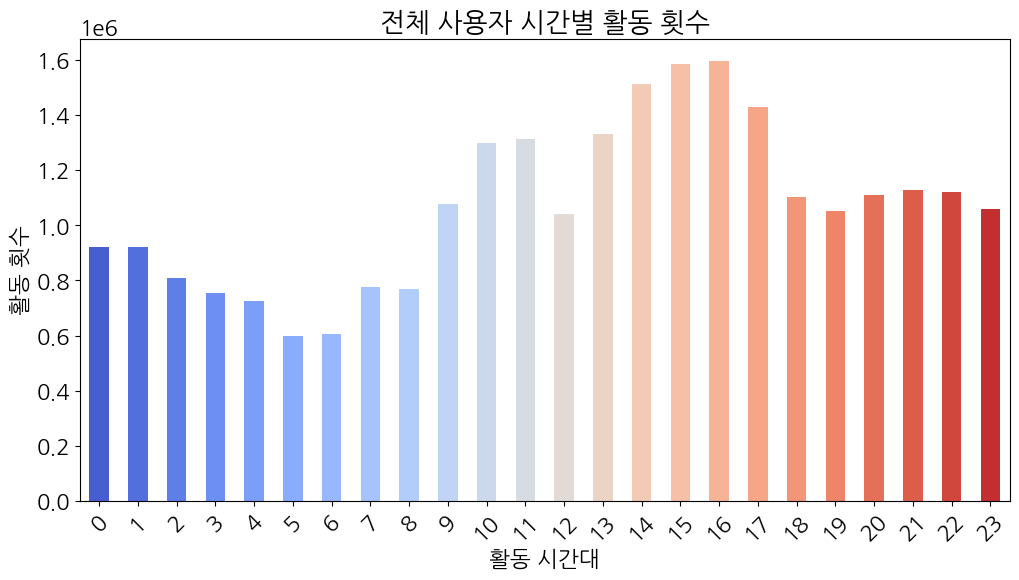

In [1923]:
visualize_activity_by_time(clean_data, '전체 사용자 시간별 활동 횟수')


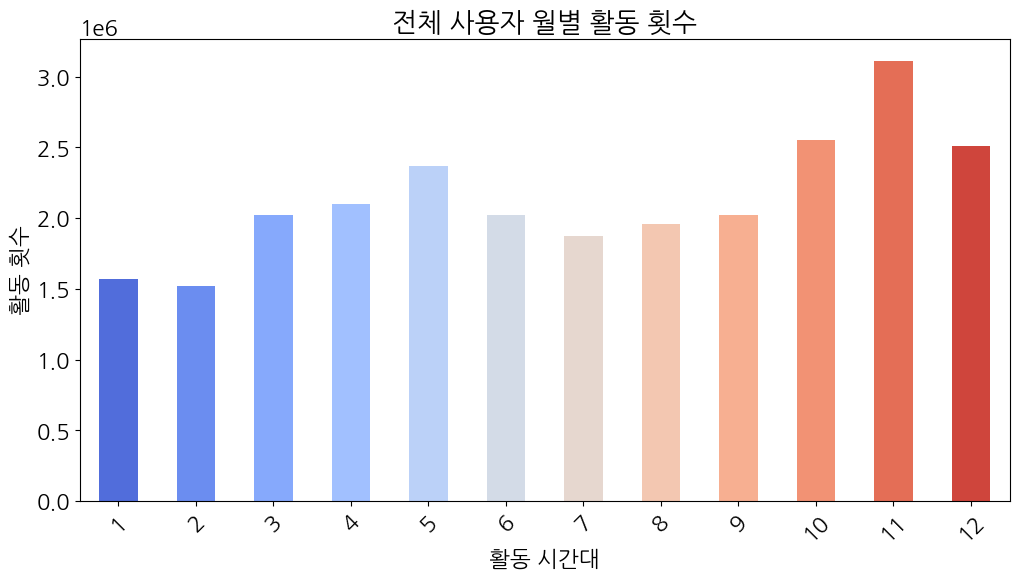

In [1924]:
visualize_monthly_content_percentage(clean_data, '전체 사용자 월별 활동 횟수')


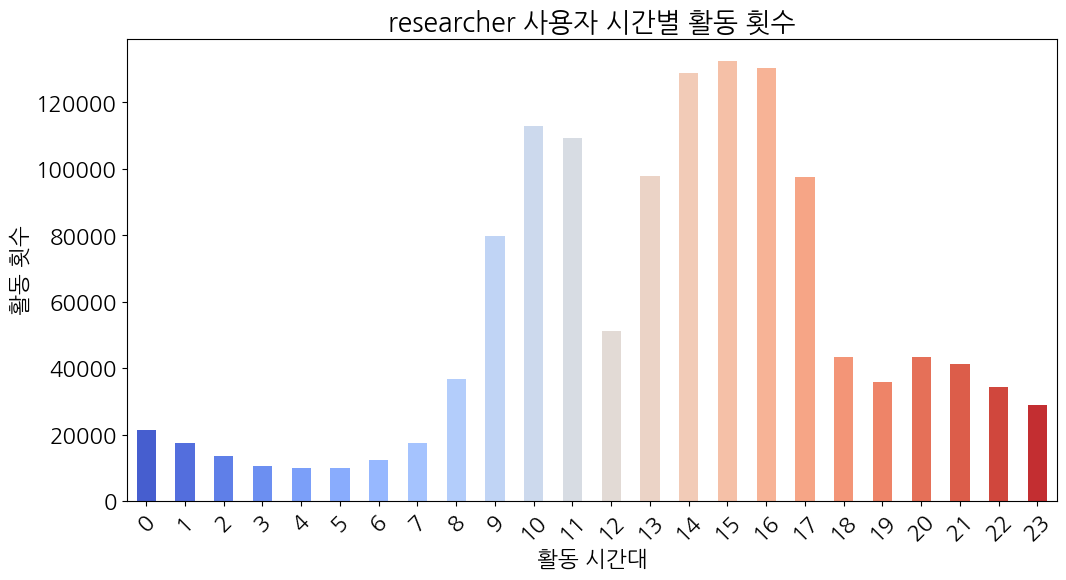

In [1925]:
researcer = clean_data[clean_data['예상 직종']=='researcher']
visualize_activity_by_time(researcer, 'researcher 사용자 시간별 활동 횟수')


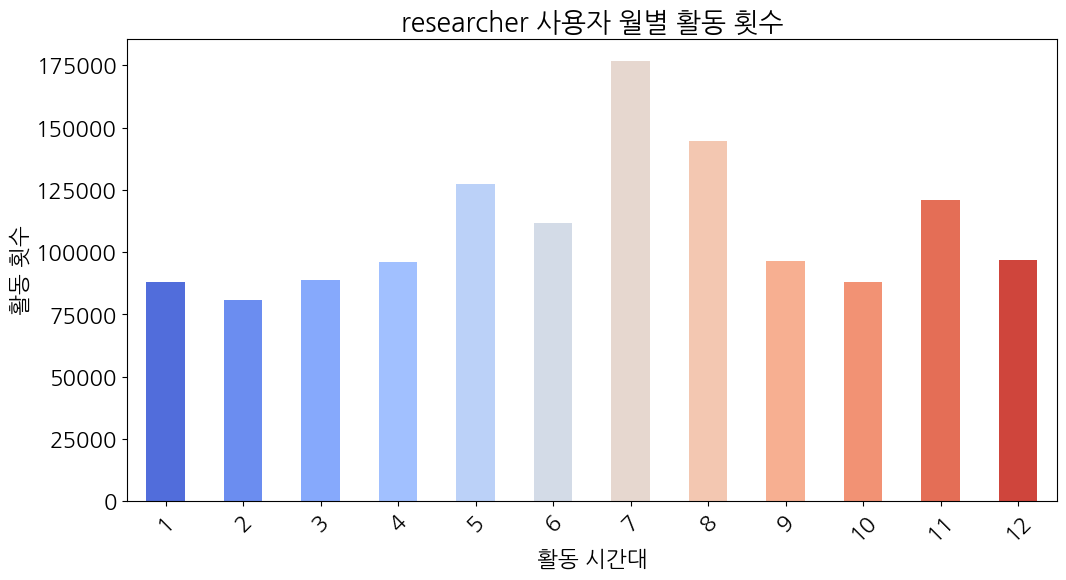

In [1926]:
visualize_monthly_content_percentage(researcer, 'researcher 사용자 월별 활동 횟수')


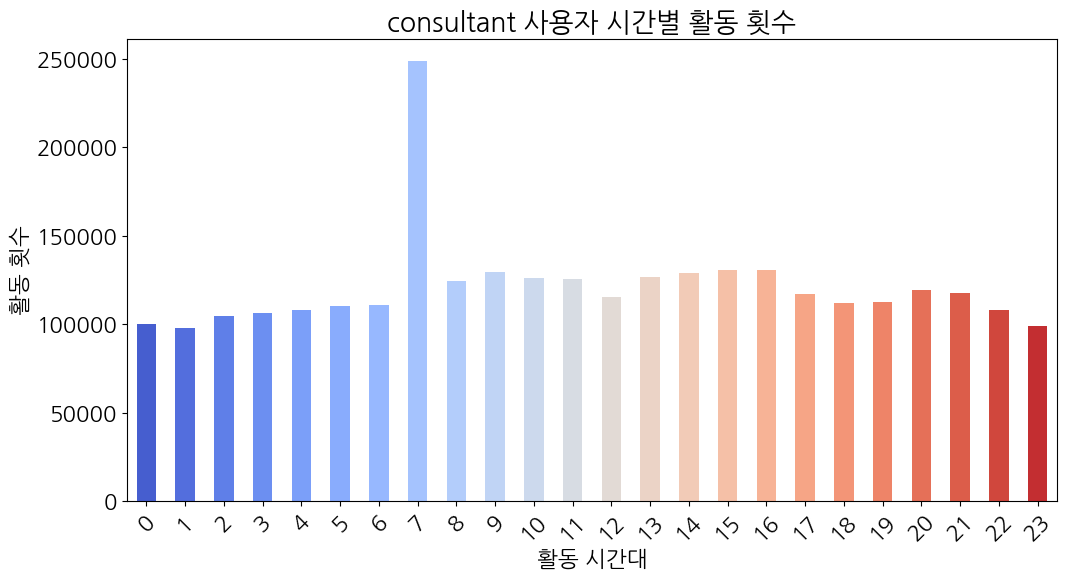

In [1927]:
consultant = clean_data[clean_data['예상 직종']=='consultant']

visualize_activity_by_time(consultant, 'consultant 사용자 시간별 활동 횟수')


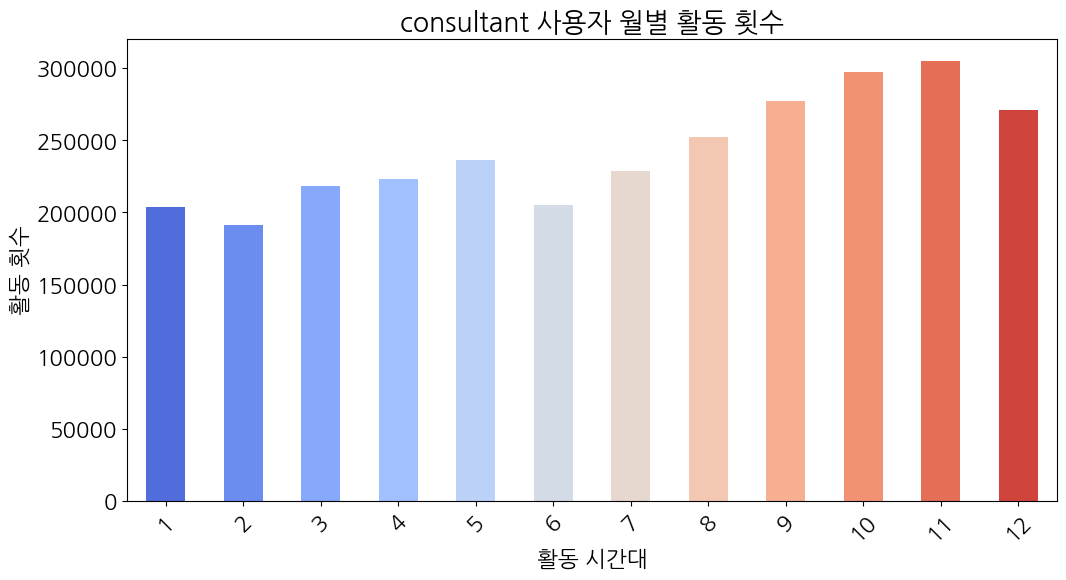

In [1928]:
visualize_monthly_content_percentage(consultant, 'consultant 사용자 월별 활동 횟수')


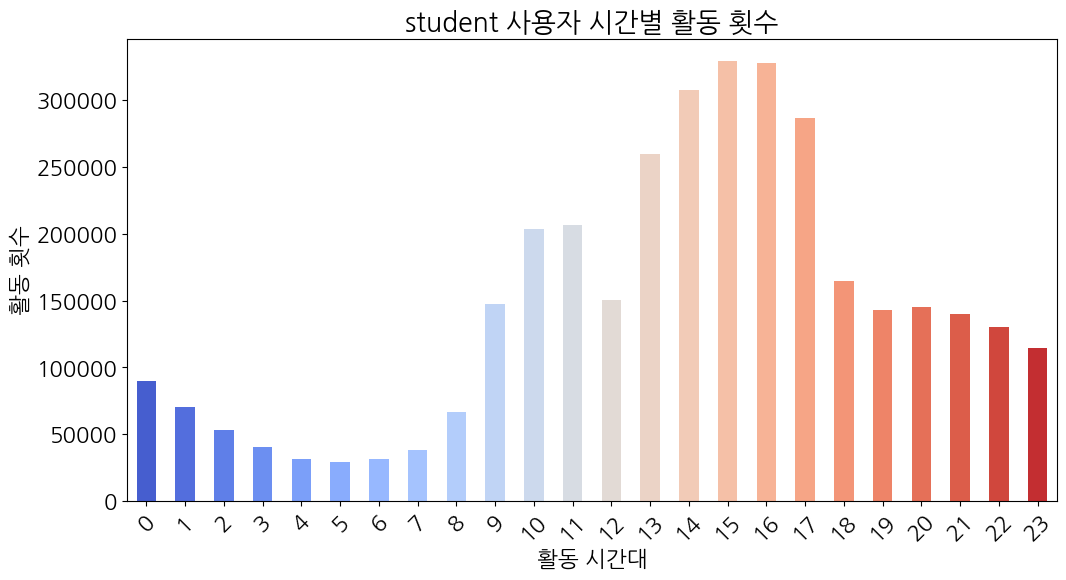

In [1929]:
student = clean_data[clean_data['예상 직종']=='student']

visualize_activity_by_time(student, 'student 사용자 시간별 활동 횟수')


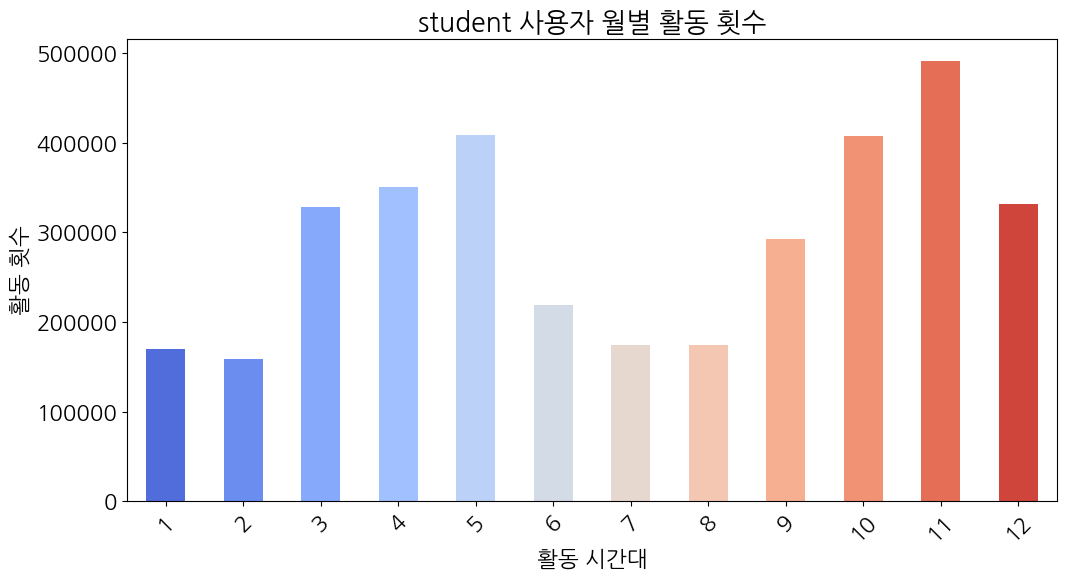

In [1930]:
visualize_monthly_content_percentage(student, 'student 사용자 월별 활동 횟수')


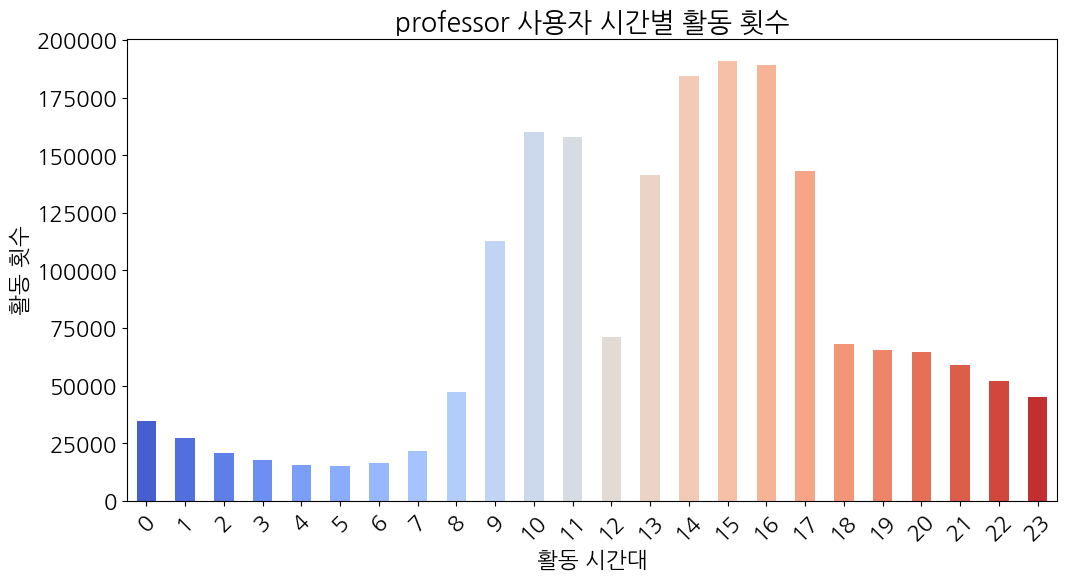

In [1931]:
professor = clean_data[clean_data['예상 직종']=='professor']

visualize_activity_by_time(professor, 'professor 사용자 시간별 활동 횟수')


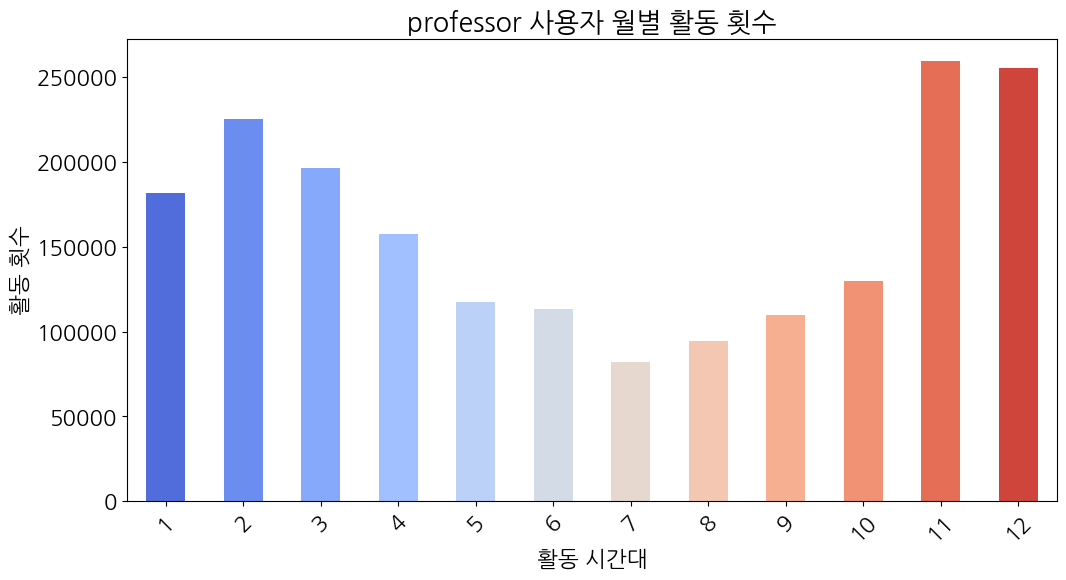

In [1932]:
visualize_monthly_content_percentage(professor, 'professor 사용자 월별 활동 횟수')


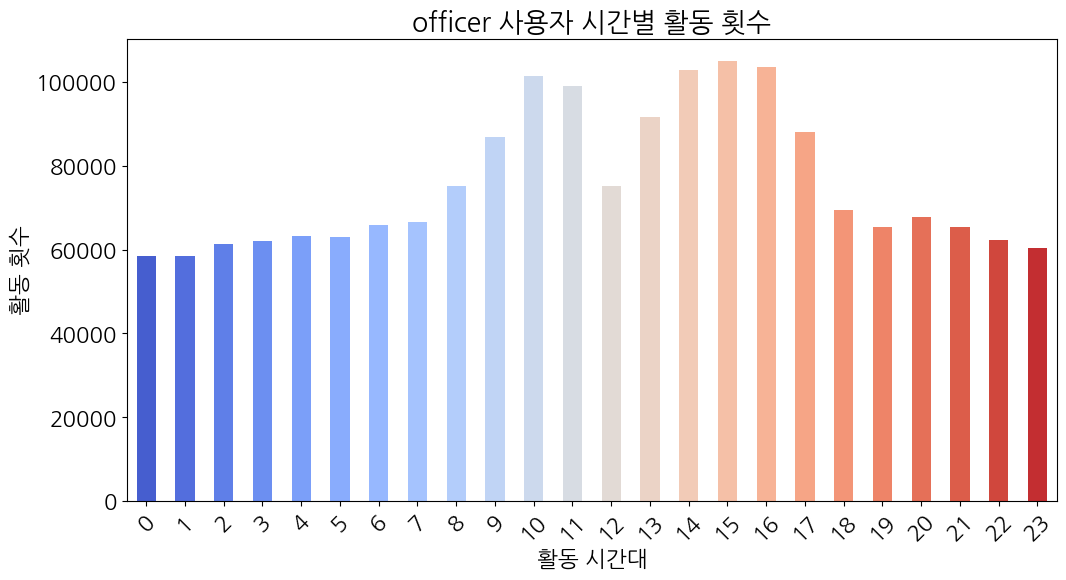

In [1933]:
officer = clean_data[clean_data['예상 직종']=='officer']

visualize_activity_by_time(officer, 'officer 사용자 시간별 활동 횟수')


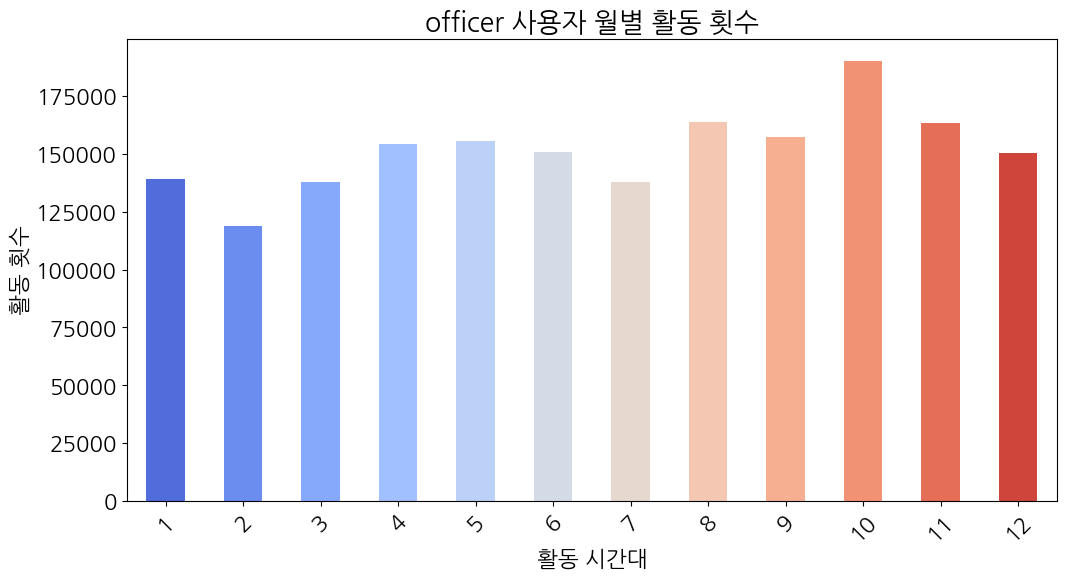

In [1934]:
visualize_monthly_content_percentage(officer, 'officer 사용자 월별 활동 횟수')


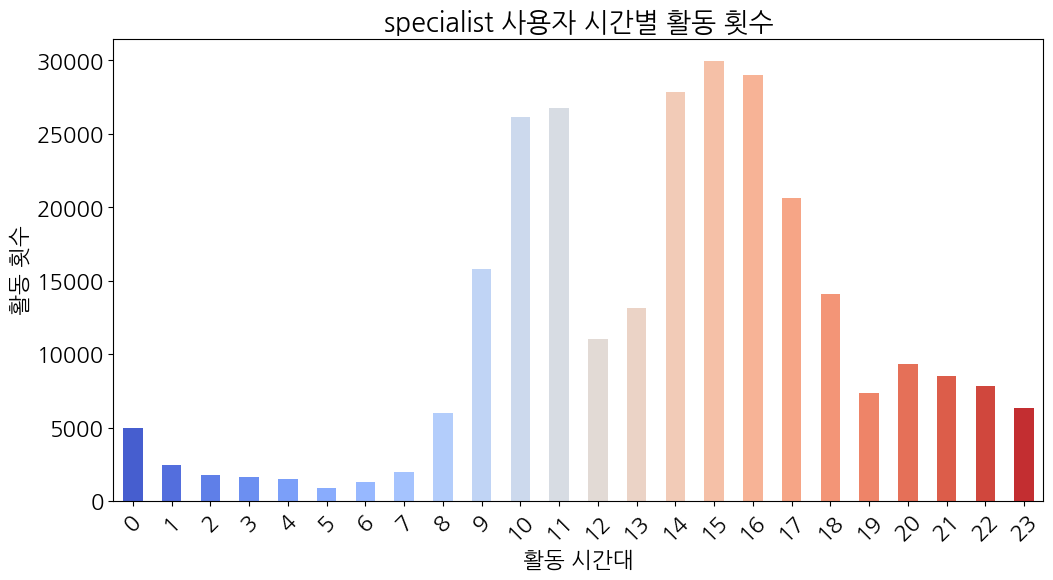

In [1935]:
specialist = clean_data[clean_data['예상 직종']=='specialist']

visualize_activity_by_time(specialist, 'specialist 사용자 시간별 활동 횟수')


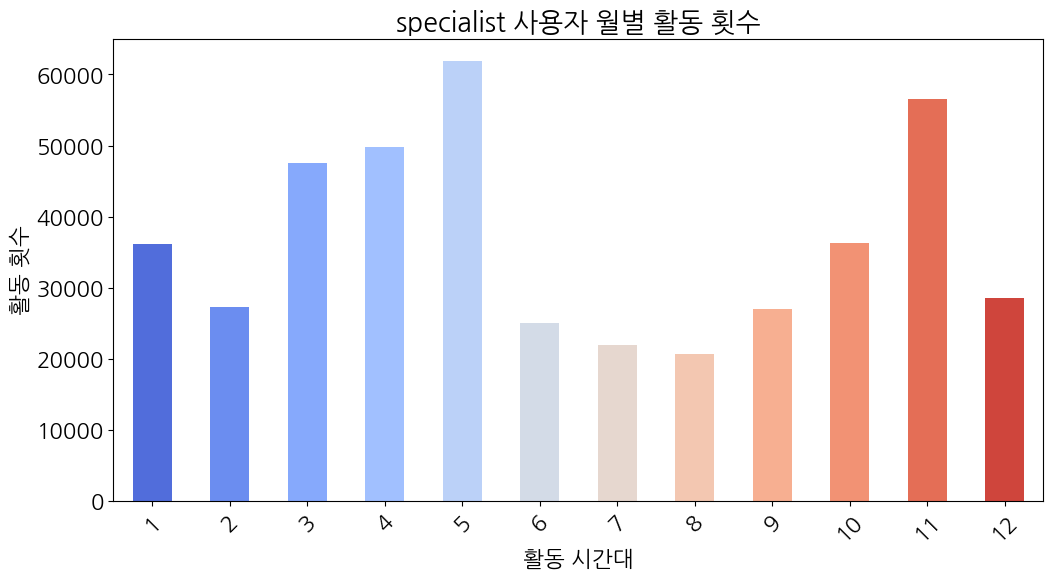

In [ ]:
visualize_monthly_content_percentage(specialist, 'specialist 사용자 월별 활동 횟수')


In [1936]:
clean_data.to_csv('clean_occupation.csv', index=False)